In [10]:
import numpy as np
import matplotlib.pyplot as plt
from Neumann_Pressure import pure_Neumann_Poisson_solver
from SaffmanTaylor import STI_solver

In [11]:
Nx = 40
Ny = 40
L = 1/2
H = 1/2
mu = 0.1
w = 0.001
inlet_vx = -0.1
Q = 12*inlet_vx*mu/(w**2)
A = w**3/mu*np.ones(shape=(Ny+2, Nx+2))

f = np.zeros(shape=(Ny,Nx))
top = np.zeros(Nx) 
bottom= np.zeros(Nx) 
left = Q*np.ones(Ny) 
right = -Q*np.ones(Ny) 

In [12]:
init_C = np.zeros(shape=(Ny, Nx))
# init_C.T[-1] = 1

init_P = P = pure_Neumann_Poisson_solver(A, f, top, bottom, left, right, Nx ,Ny, L, H, True)

f = np.zeros(shape=(Ny, Nx))

inlet_Flux = np.zeros(shape=(Ny, Nx))
inlet_Flux.T[-2:] = 1

start decomposition


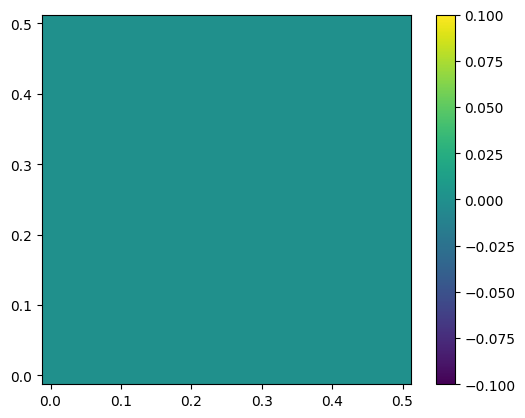

In [ ]:
plt.imshow(init_C, extent=[-L/Nx, L+L/Nx, -H/Ny, H+H/Ny])
plt.colorbar()

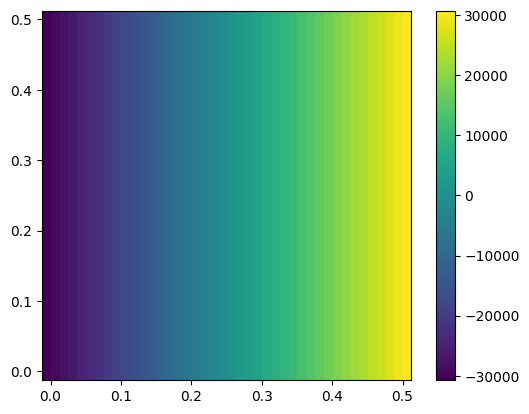

In [ ]:
plt.imshow(init_P[0], extent=[-L/Nx, L+L/Nx, -H/Ny, H+H/Ny])
plt.colorbar()

Text(0.5, 1.0, 'Vy0')

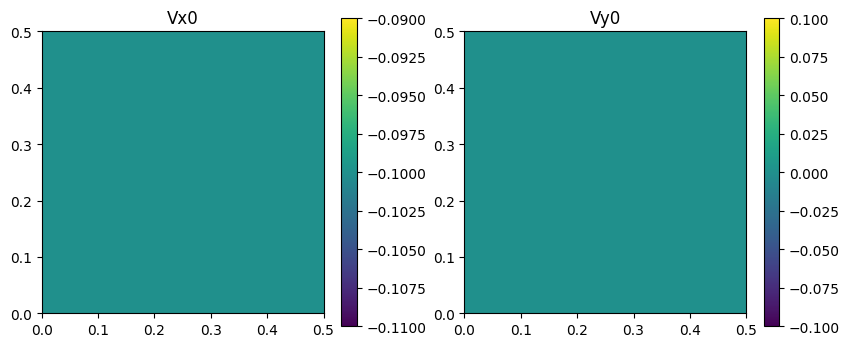

In [ ]:
dp_dx = (init_P[0][:,2:]-init_P[0][:,:-2])/(2*L/Nx)
dp_dy = (init_P[0][2:]-init_P[0][:-2])/(2*H/Ny)
u, v = -w**2/(12*mu)*dp_dx[1:-1], -w**2/(12*mu)*dp_dy[:,1:-1]
v[0] = 0 # непротекание?
v[-1] = 0 # непротекание?
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(np.round(u,4), extent=[0, L, 0, H])
plt.colorbar()
plt.title(f"Vx0")
plt.subplot(122)
plt.imshow(np.round(v,4), extent=[0, L, 0, H])
plt.colorbar()
plt.title(f"Vy0")

In [ ]:
Nt = 100
ticks, P, Vx, Vy, C, P_error = STI_solver(Nt,
                                 init_C, #init_C / C[-1]
                                 inlet_Flux,
                                 init_P, #init_P / (P[-1],P_error[-1])
                                 Nx, Ny,
                                 H, L,
                                 W0=w, v_in=inlet_vx, Plot_press_error=False)

tick: 1
start decomposition
end decomposition
start matmul
tick: 2
start decomposition
end decomposition
start matmul
tick: 3
start decomposition
end decomposition
start matmul
tick: 4
start decomposition
end decomposition
start matmul
tick: 5
start decomposition
end decomposition
start matmul
tick: 6
start decomposition
end decomposition
start matmul
tick: 7
start decomposition
end decomposition
start matmul
tick: 8
start decomposition
end decomposition
start matmul
tick: 9
start decomposition
end decomposition
start matmul
tick: 10
start decomposition
end decomposition
start matmul
tick: 11
start decomposition
end decomposition
start matmul
tick: 12
start decomposition
end decomposition
start matmul
tick: 13
start decomposition
end decomposition
start matmul
tick: 14
start decomposition
end decomposition
start matmul
tick: 15
start decomposition
end decomposition
start matmul
tick: 16
start decomposition
end decomposition
start matmul
tick: 17
start decomposition
end decomposition
st

Text(0, 0.5, 'poisson equation MSPE, %')

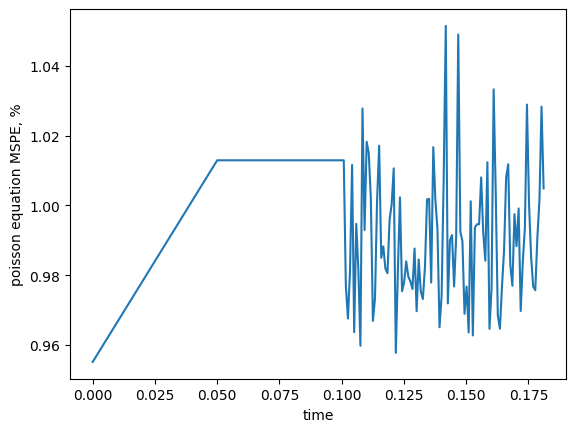

In [ ]:
plt.plot(ticks, P_error)
plt.xlabel('time')
plt.ylabel('poisson equation MSPE, %')

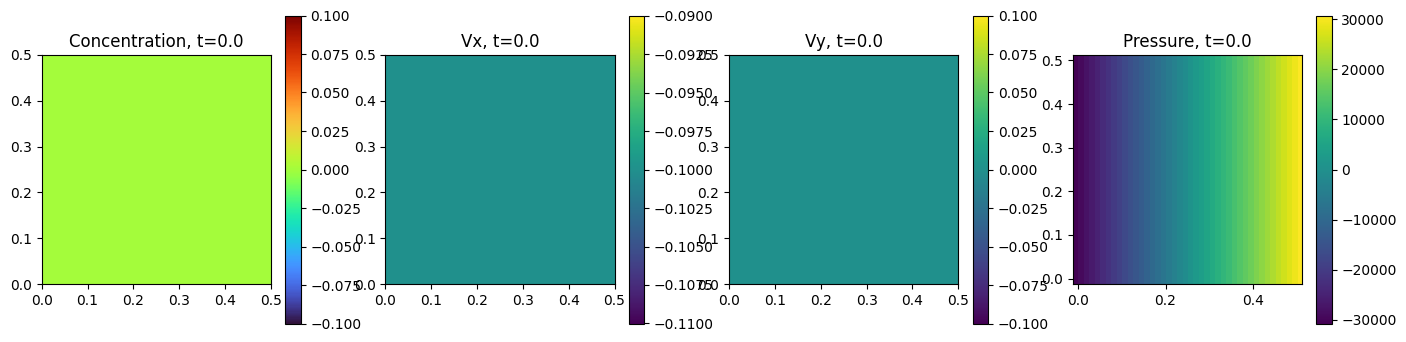

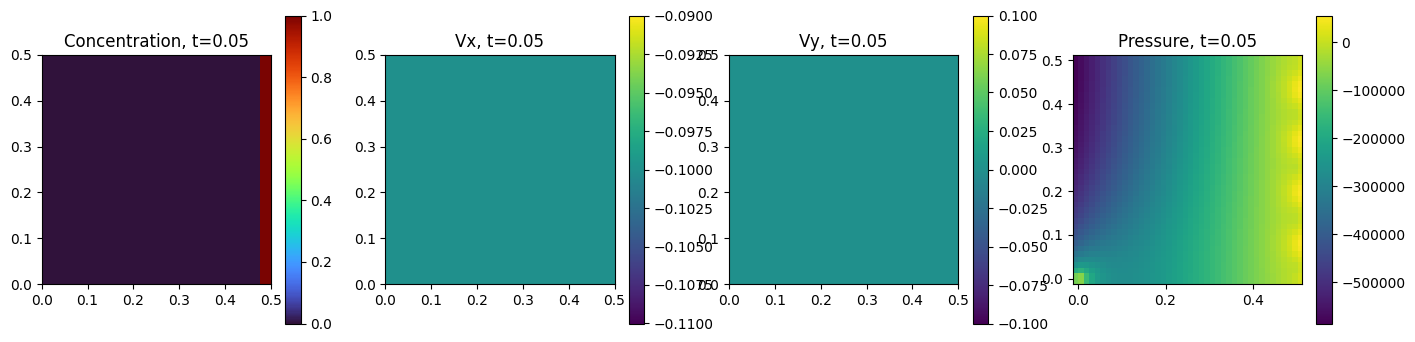

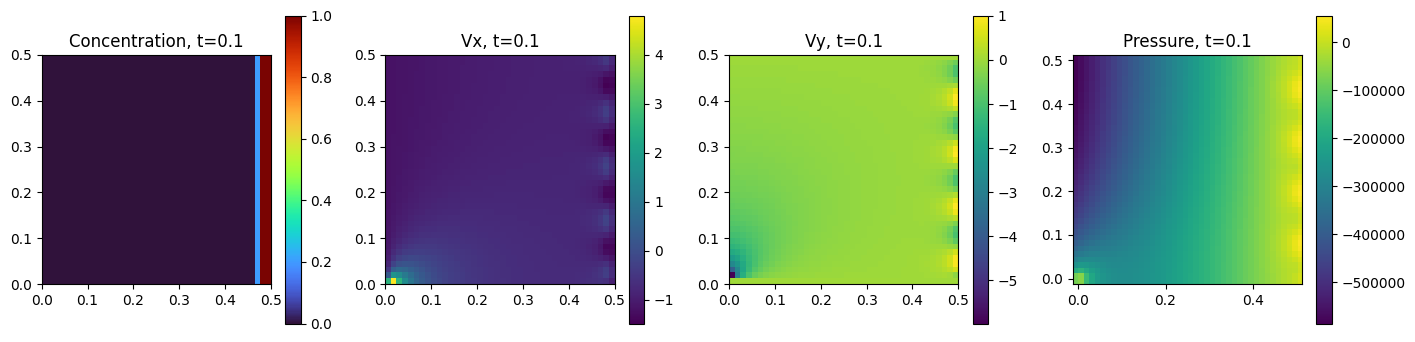

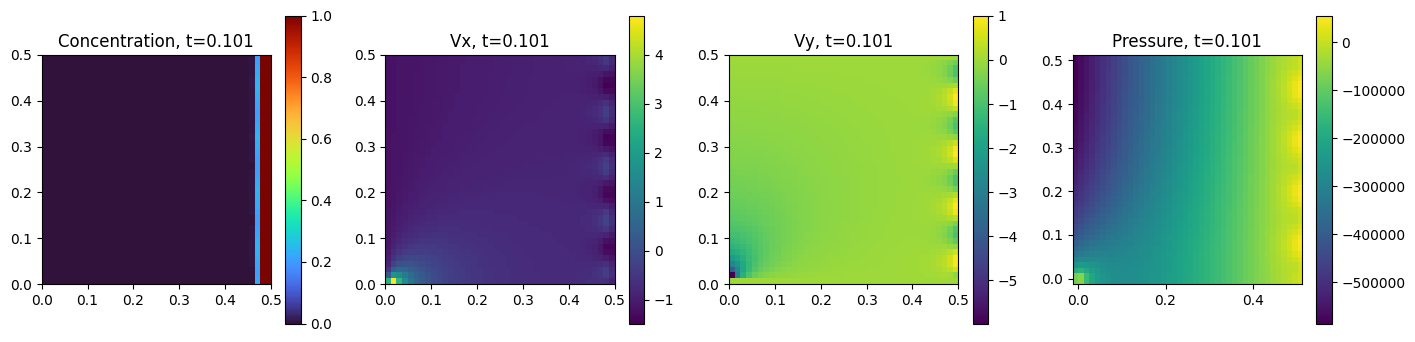

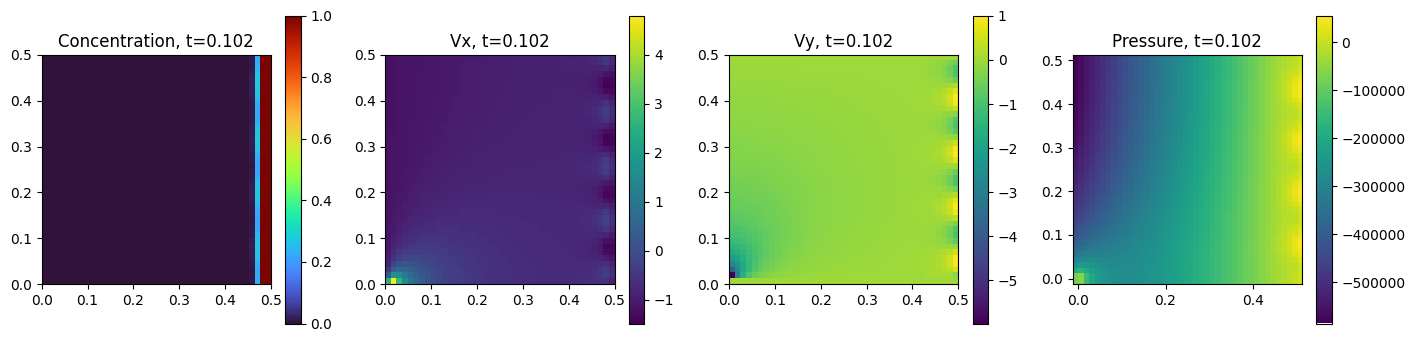

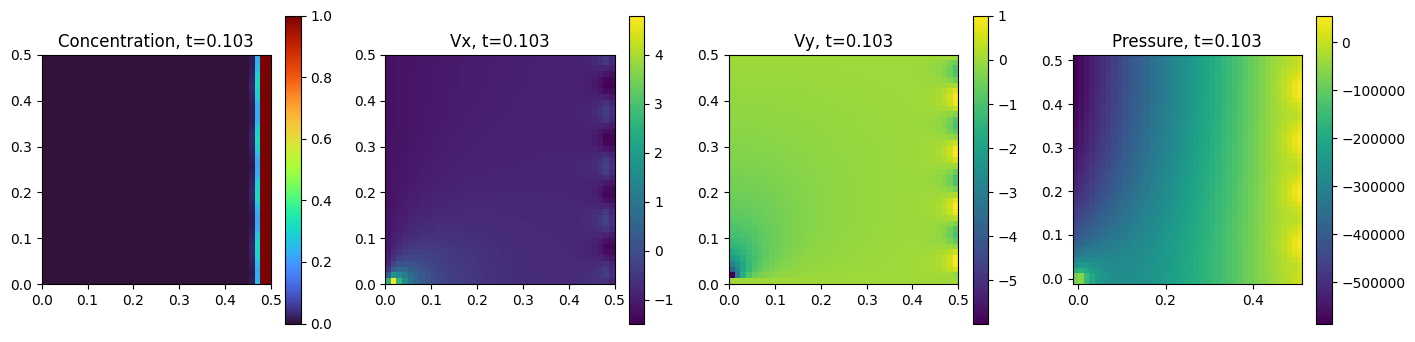

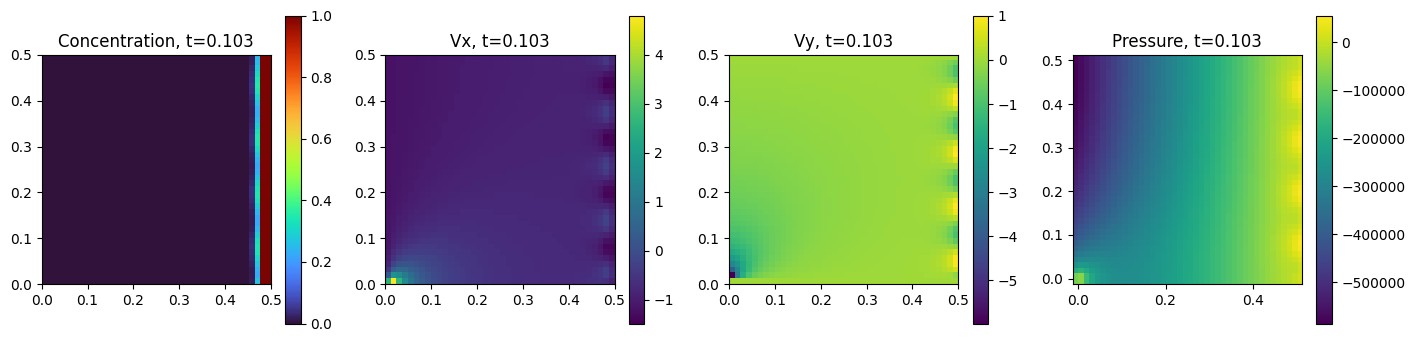

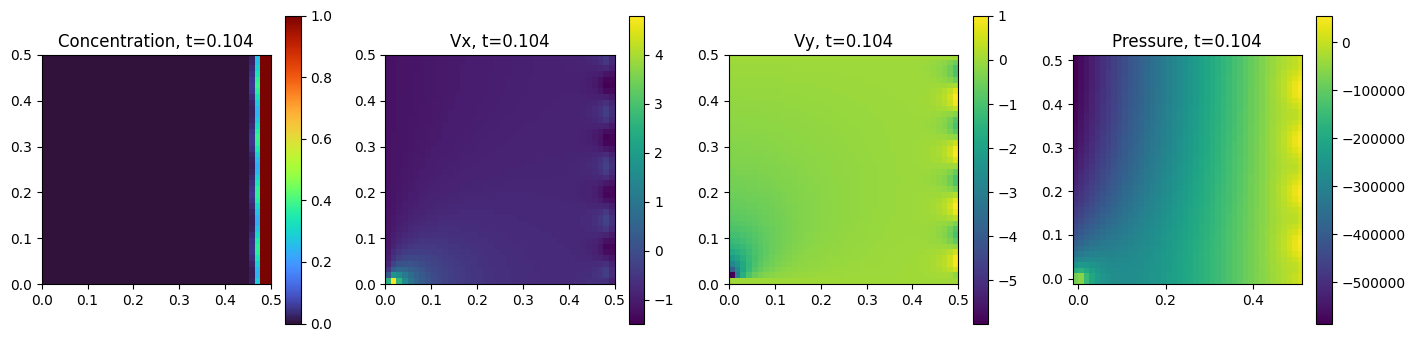

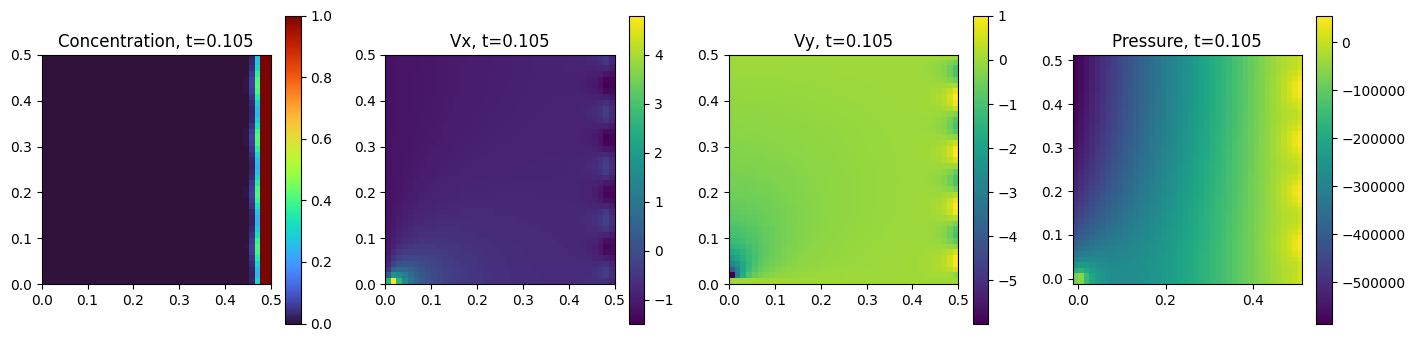

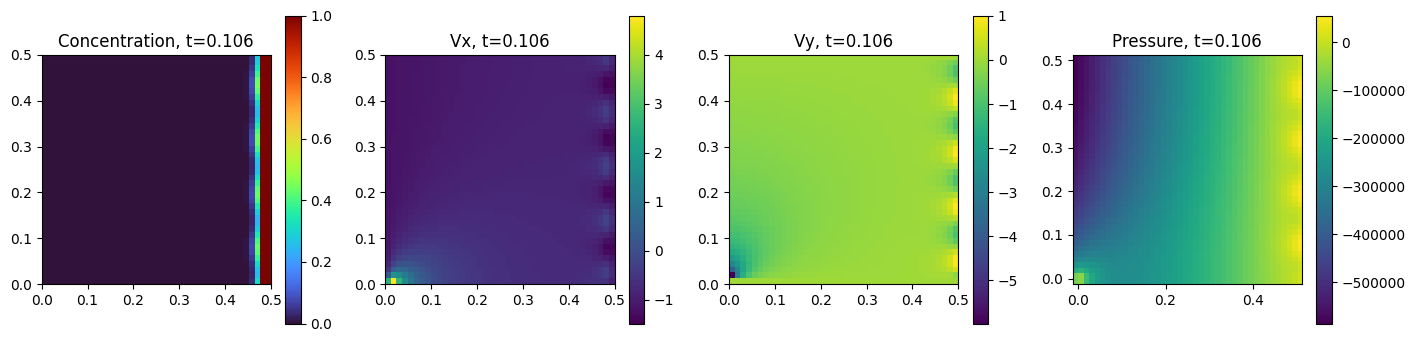

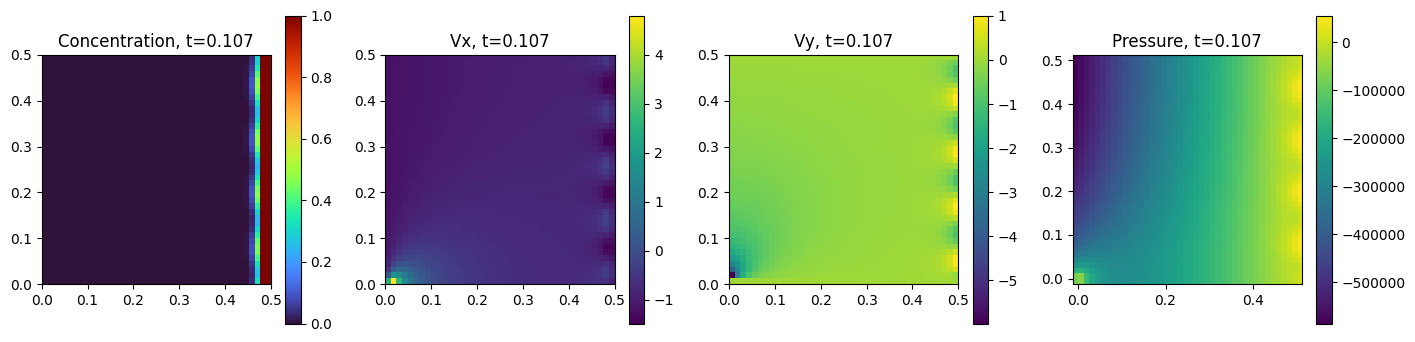

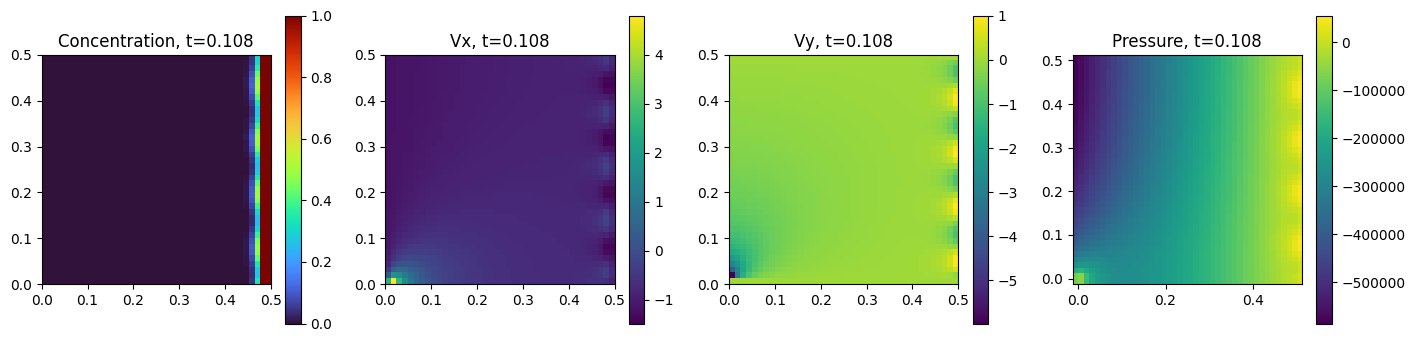

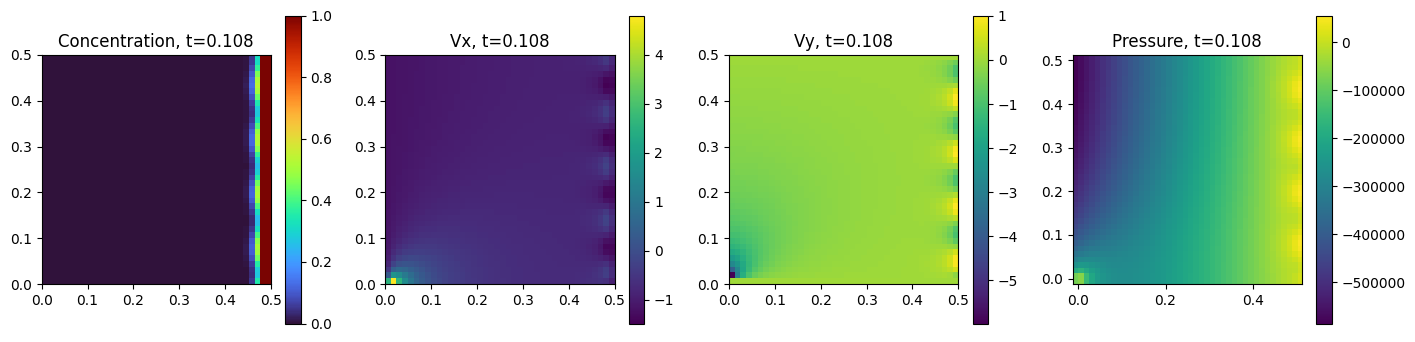

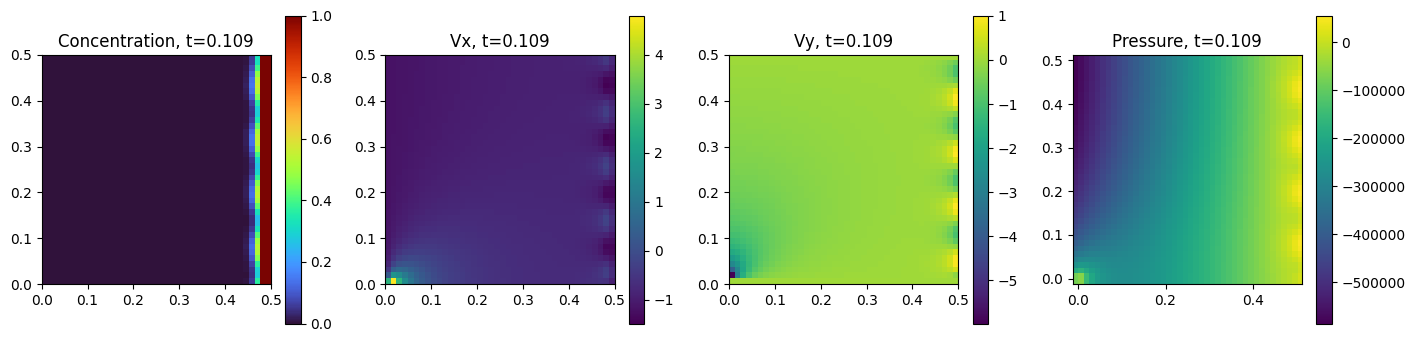

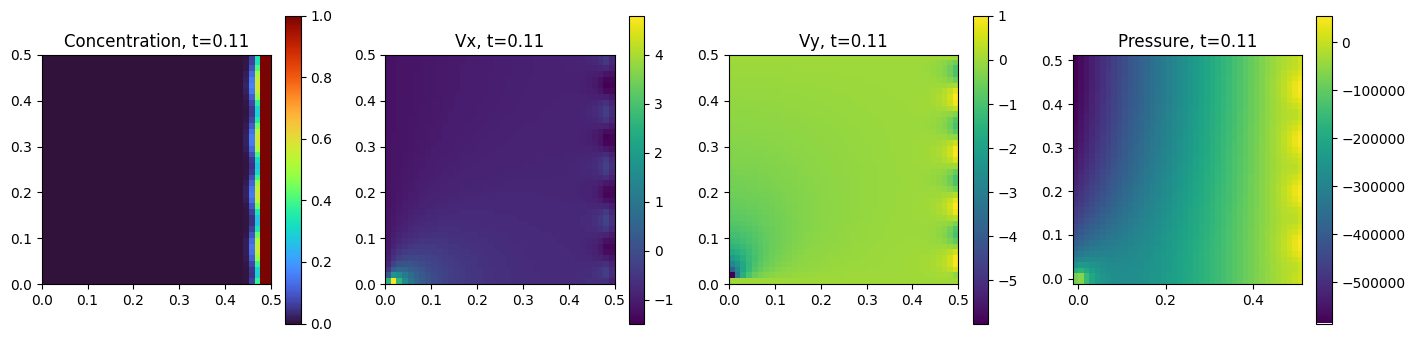

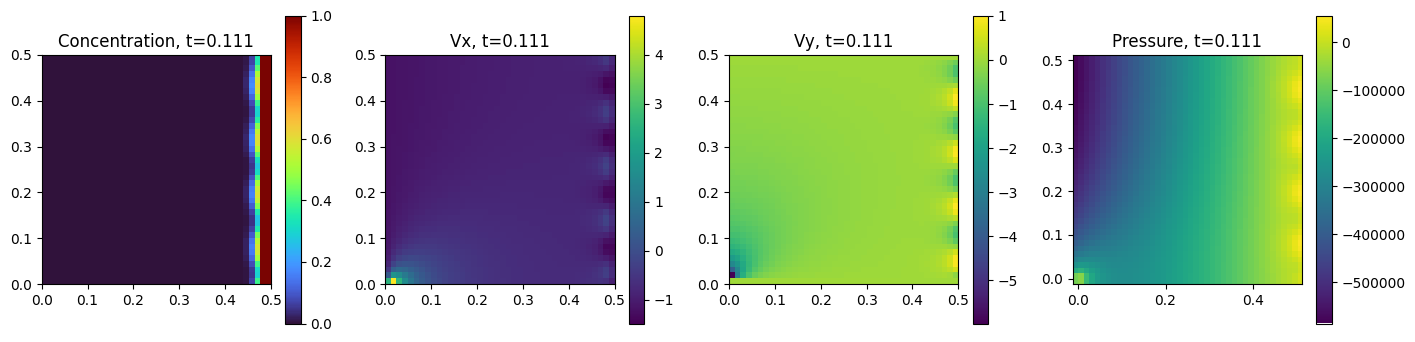

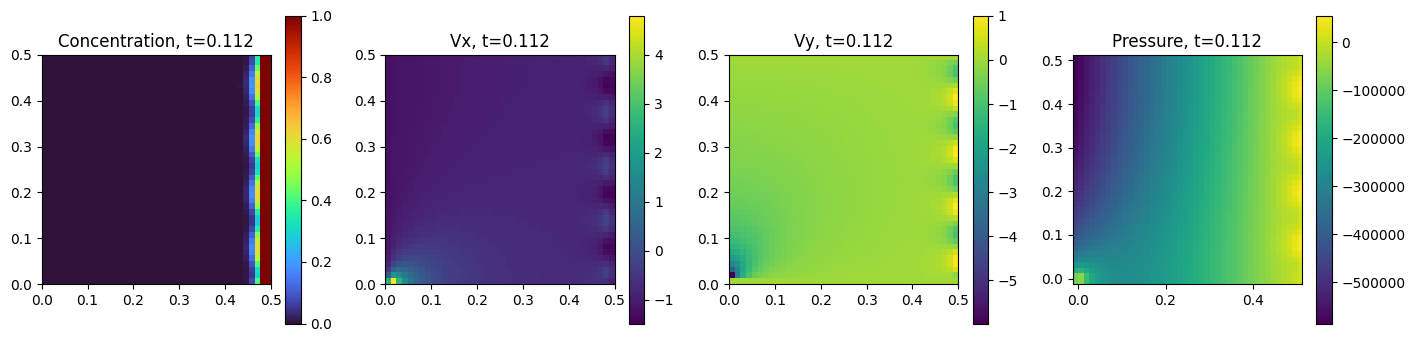

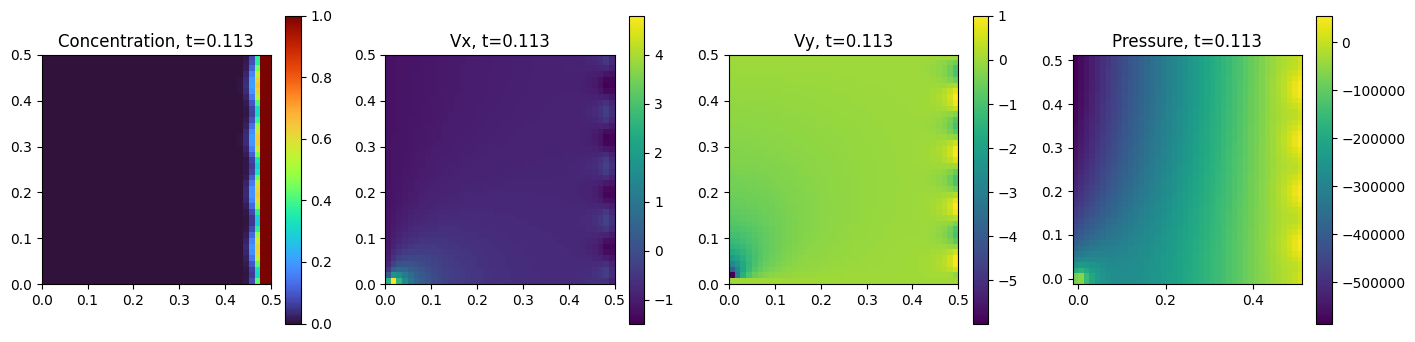

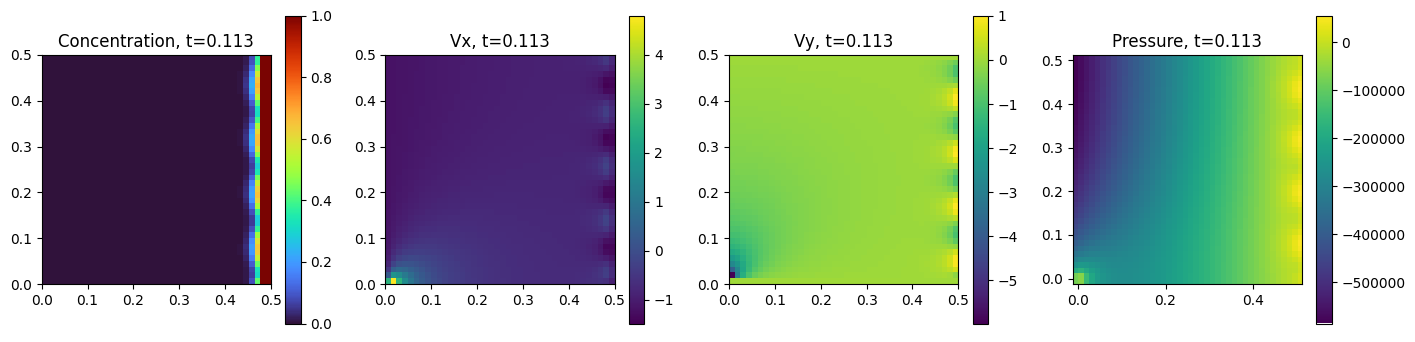

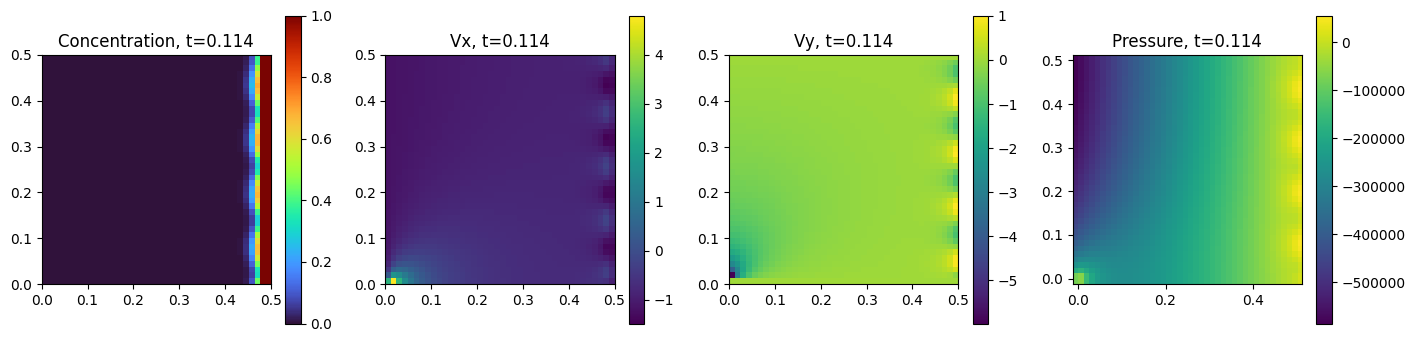

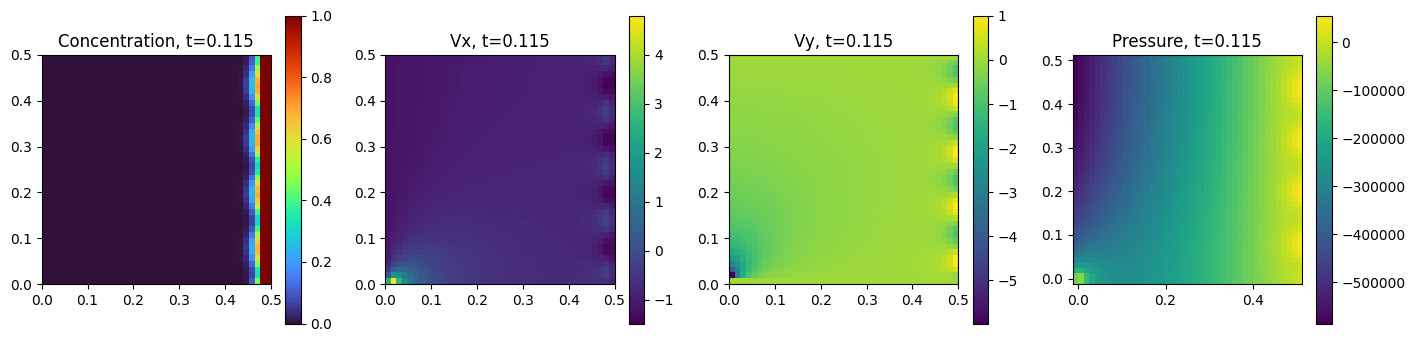

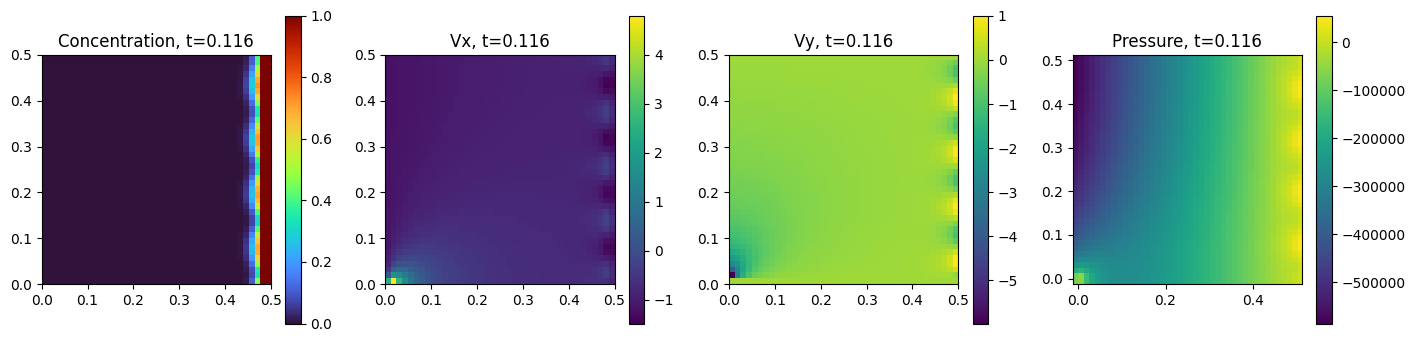

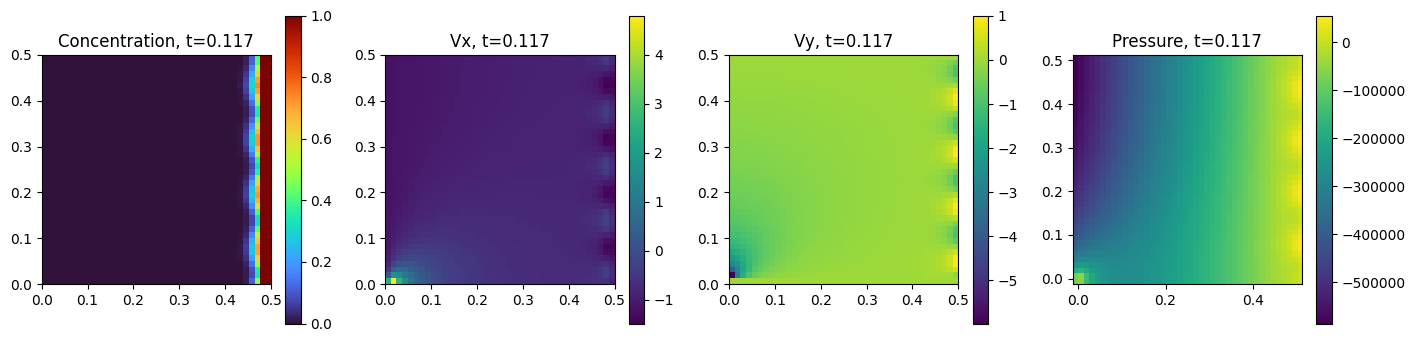

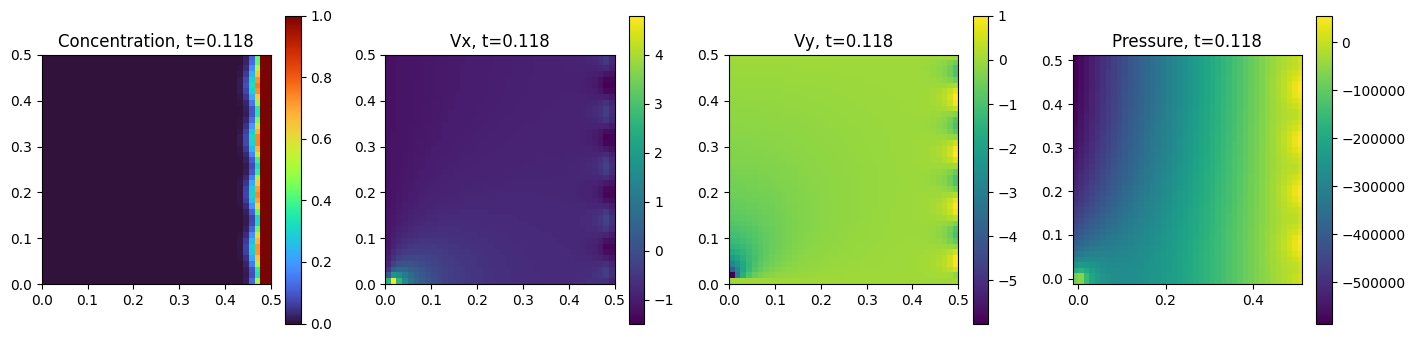

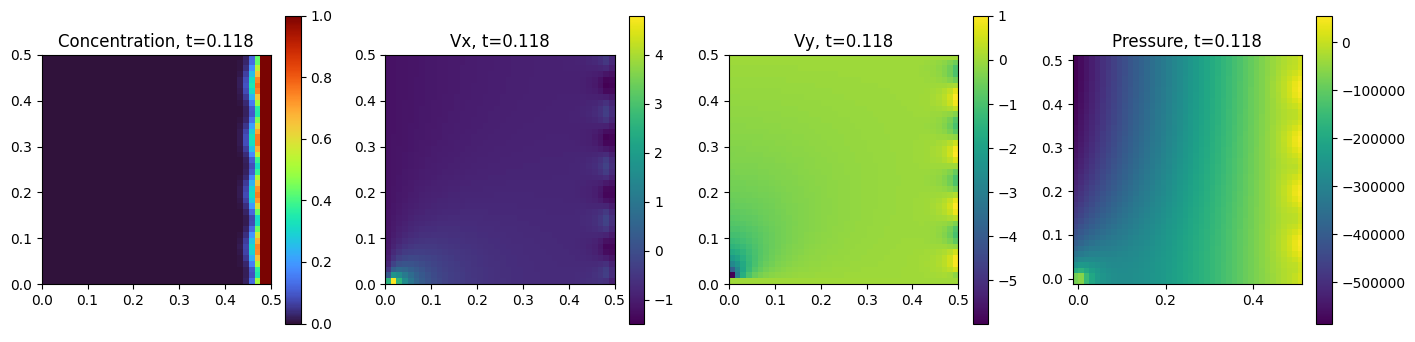

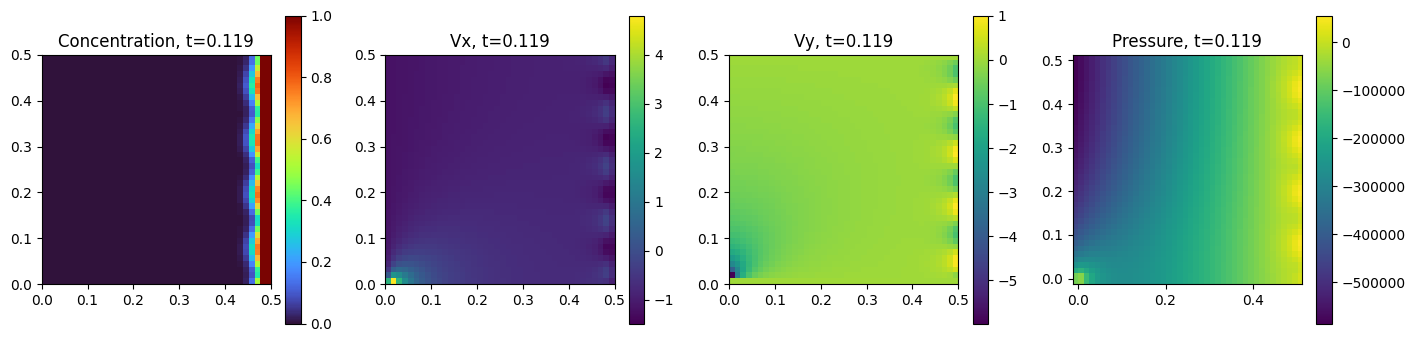

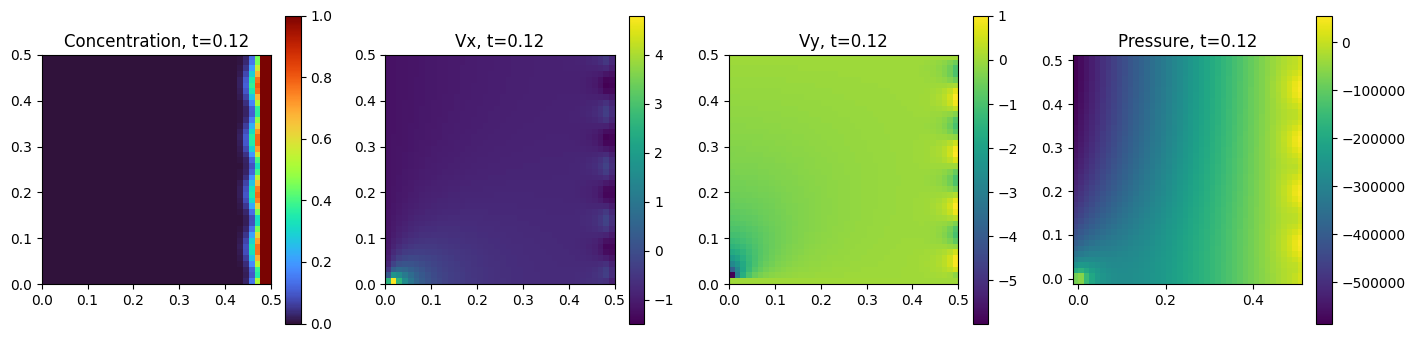

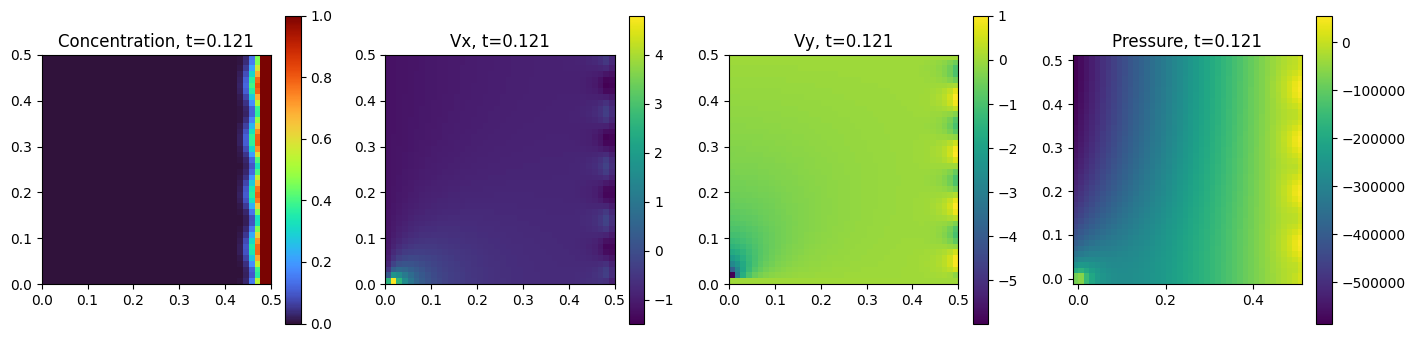

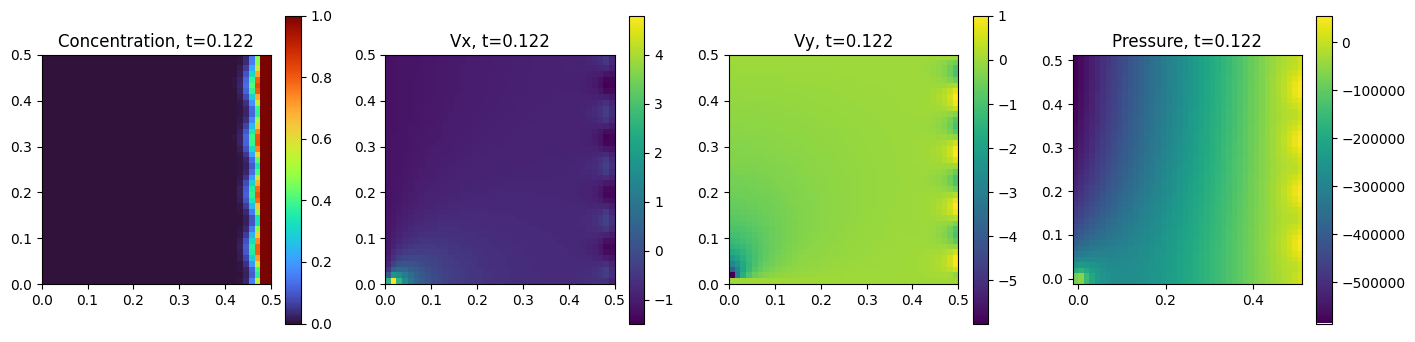

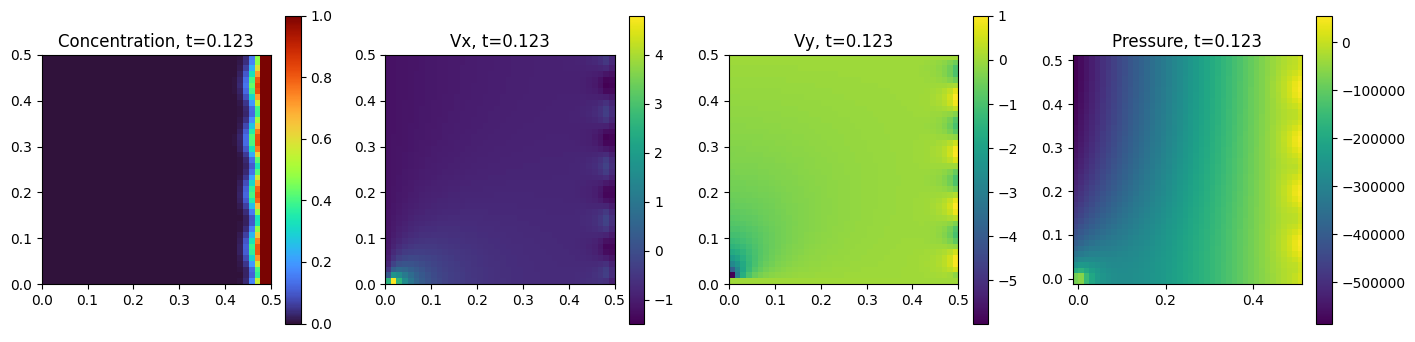

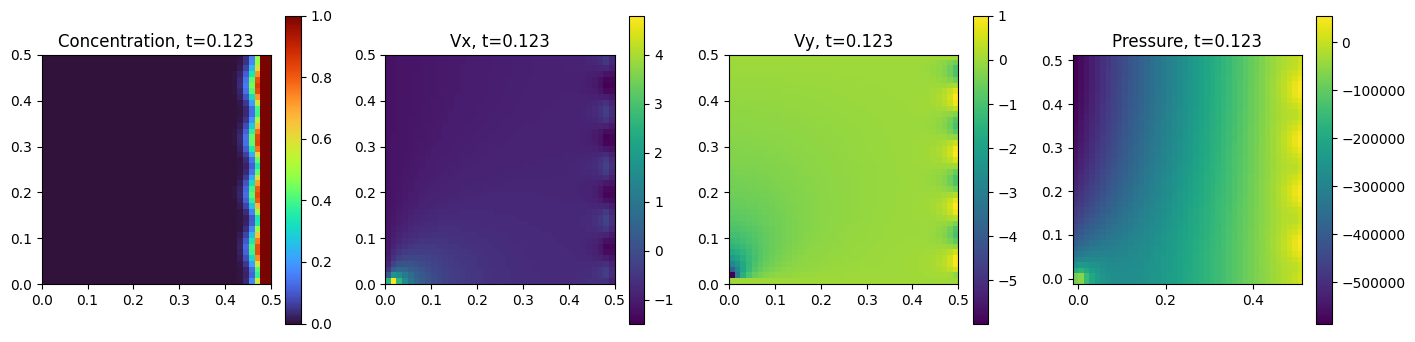

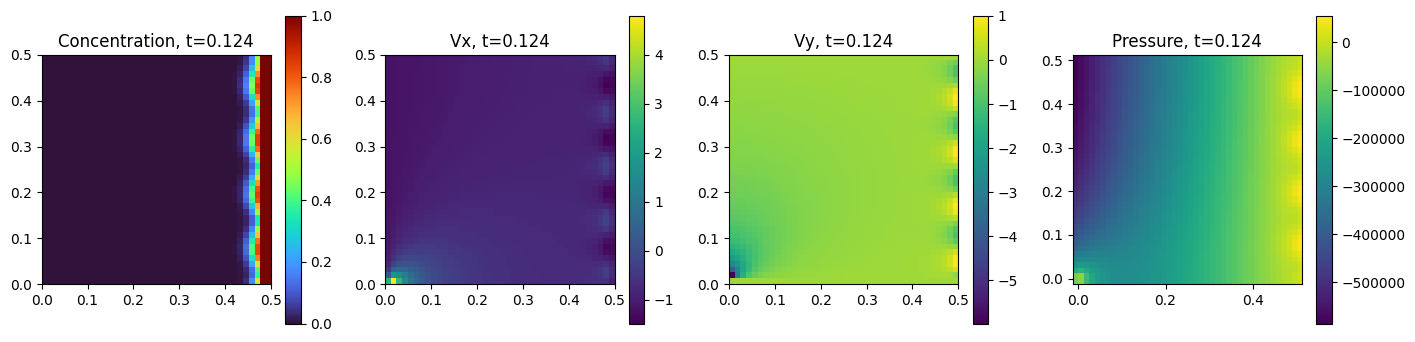

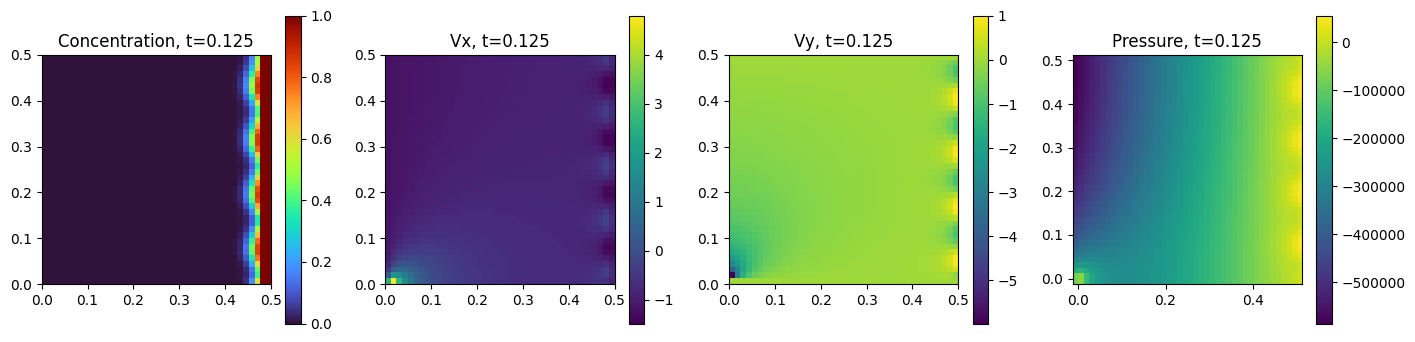

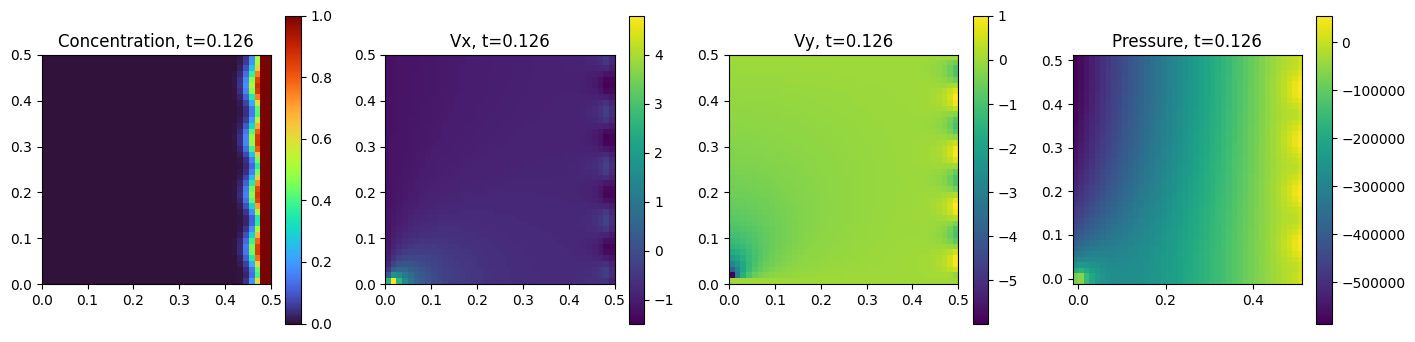

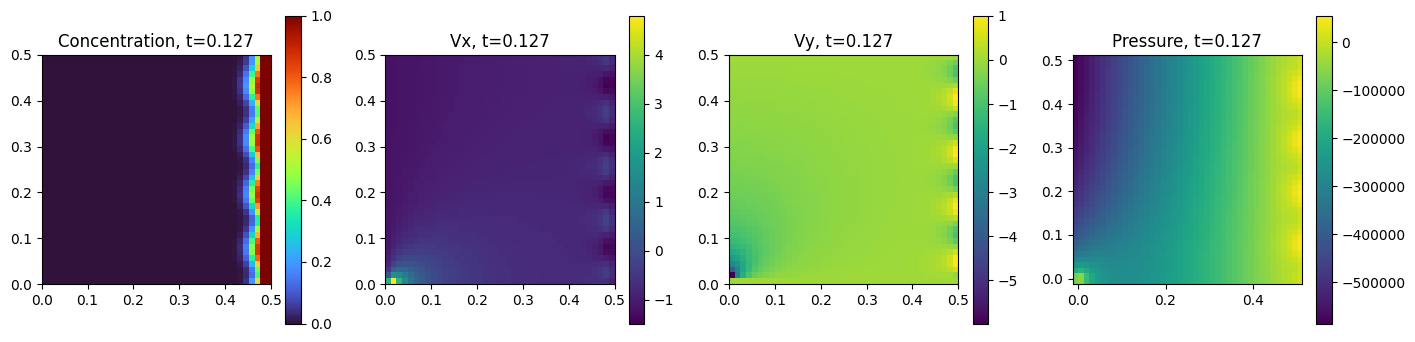

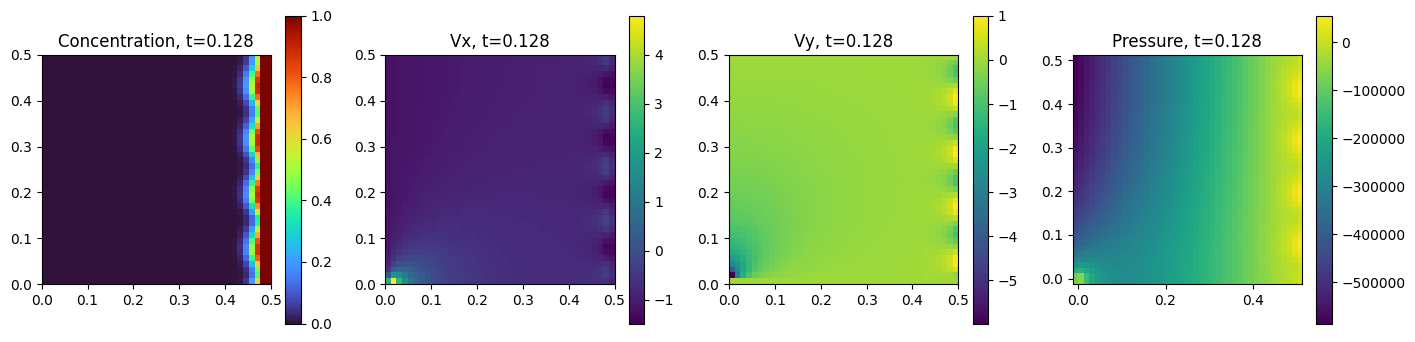

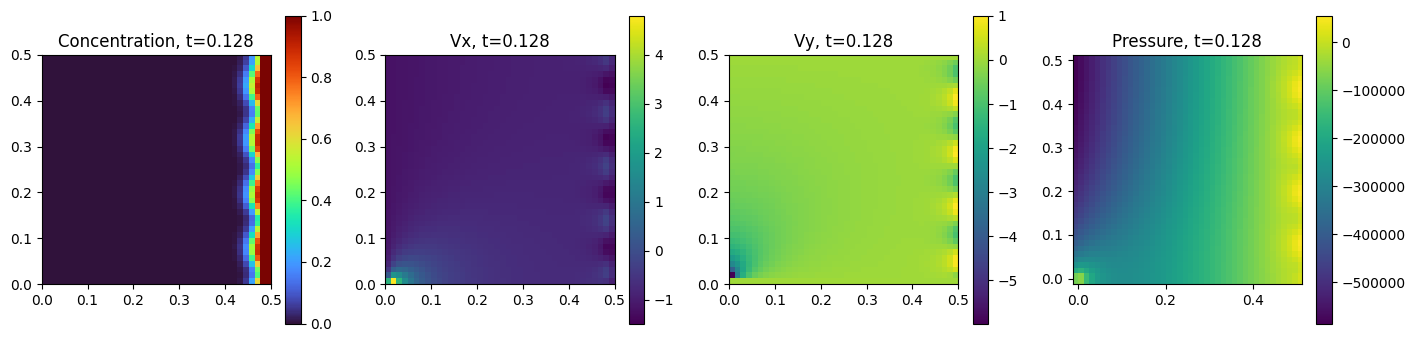

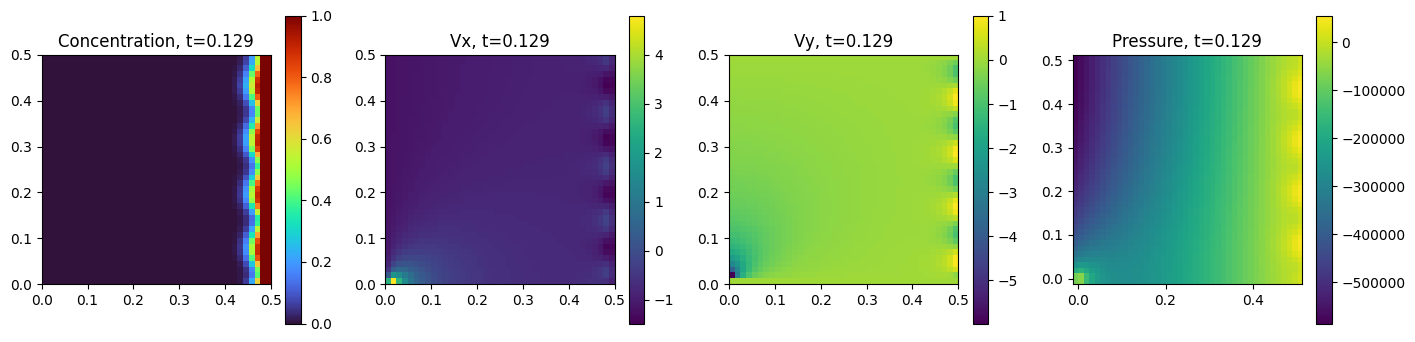

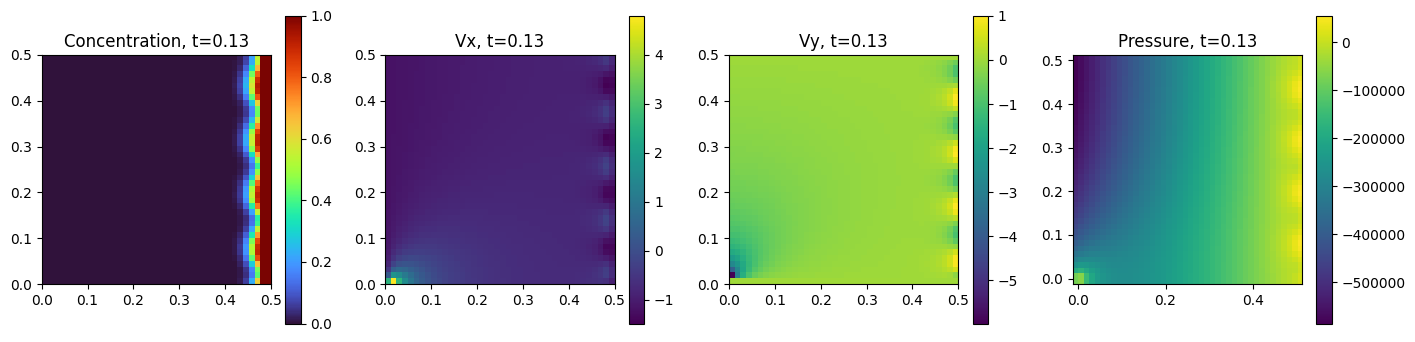

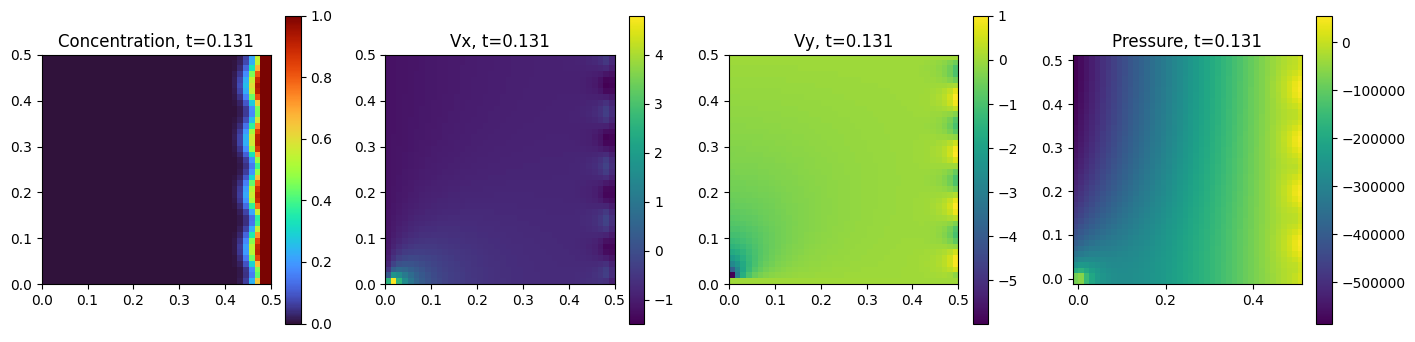

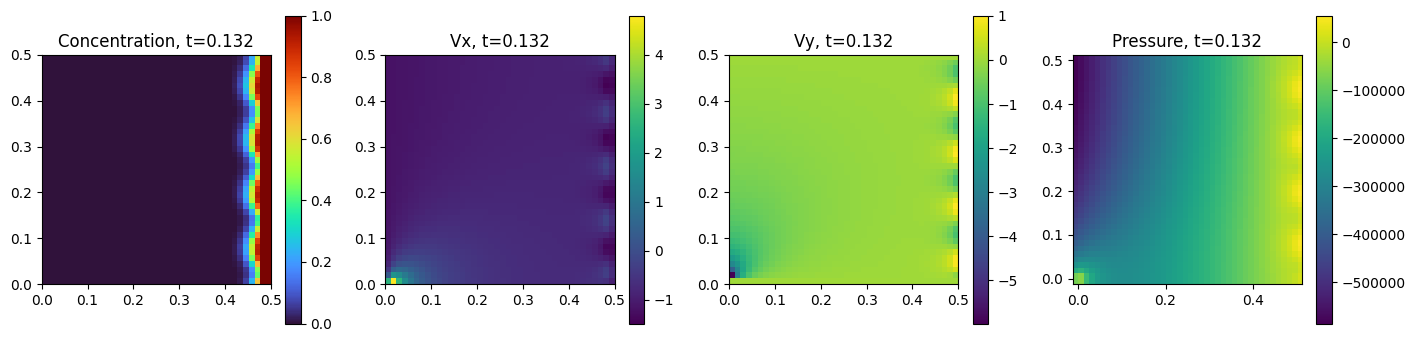

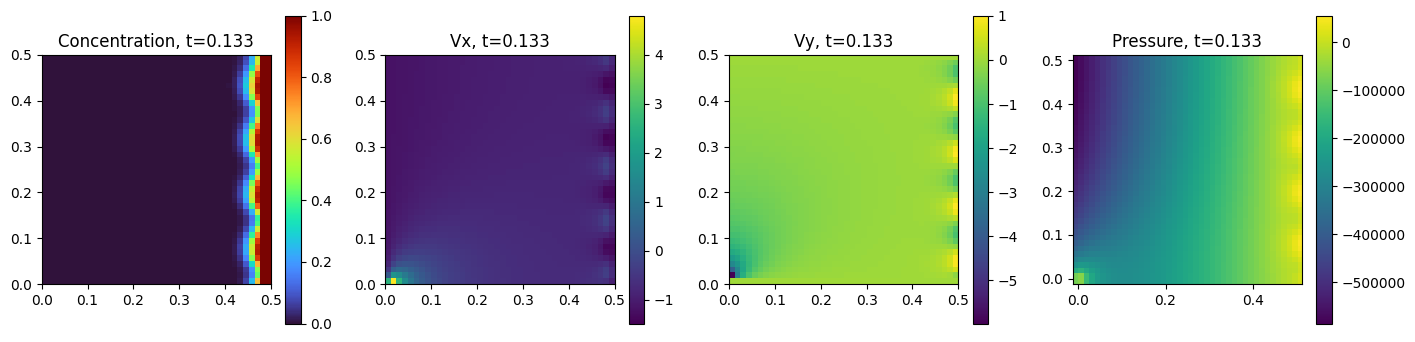

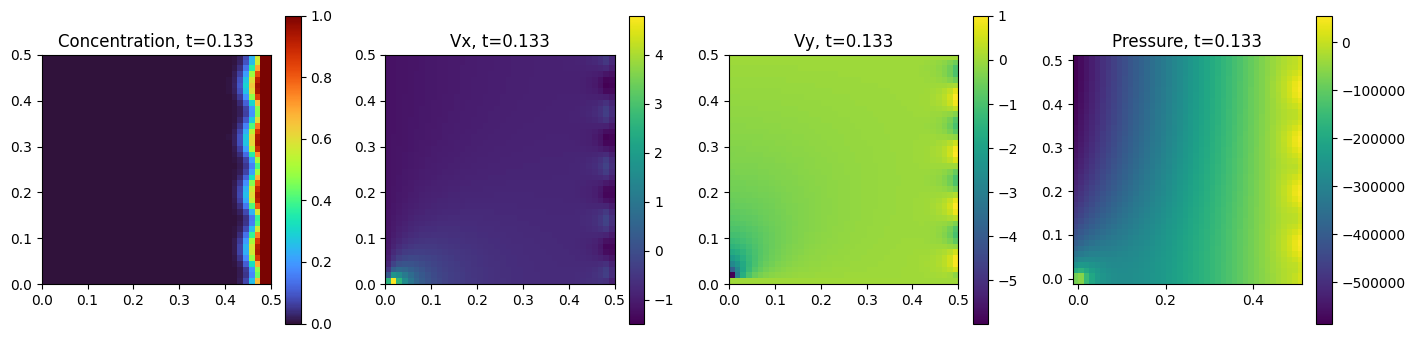

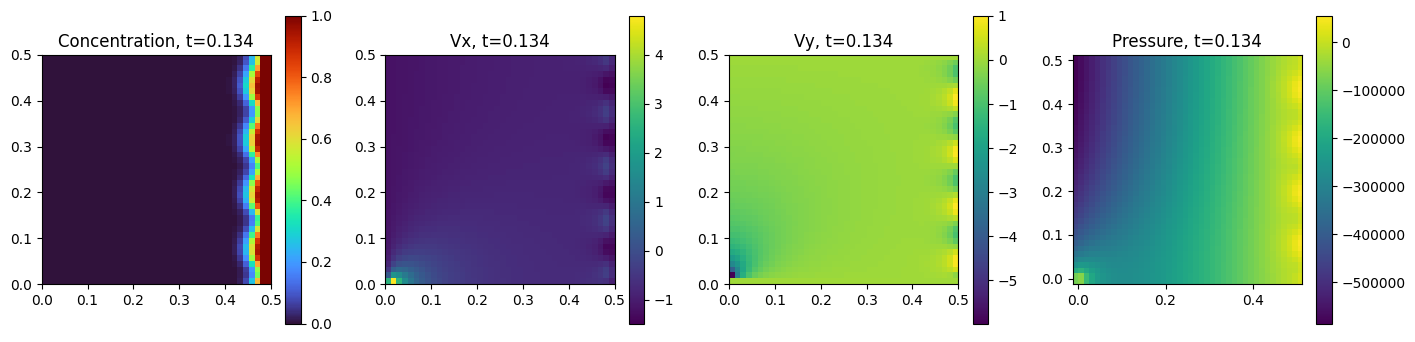

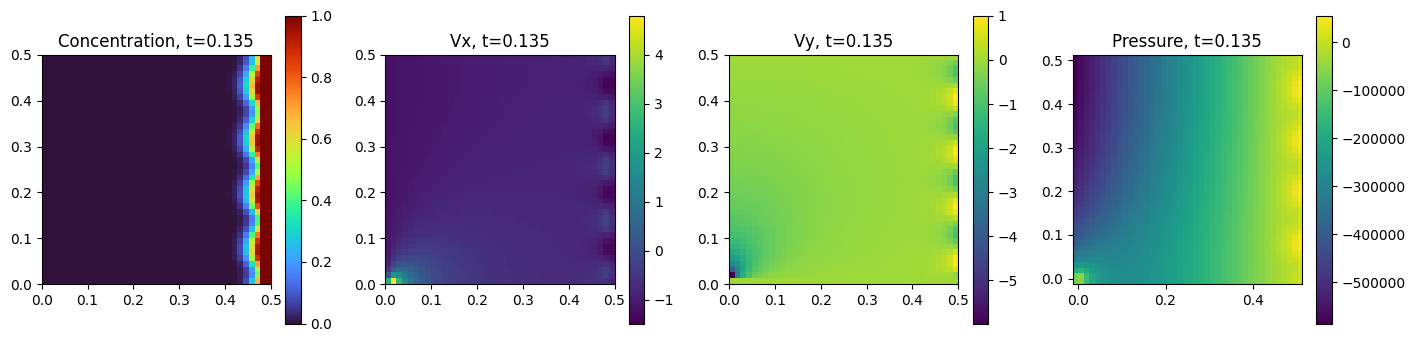

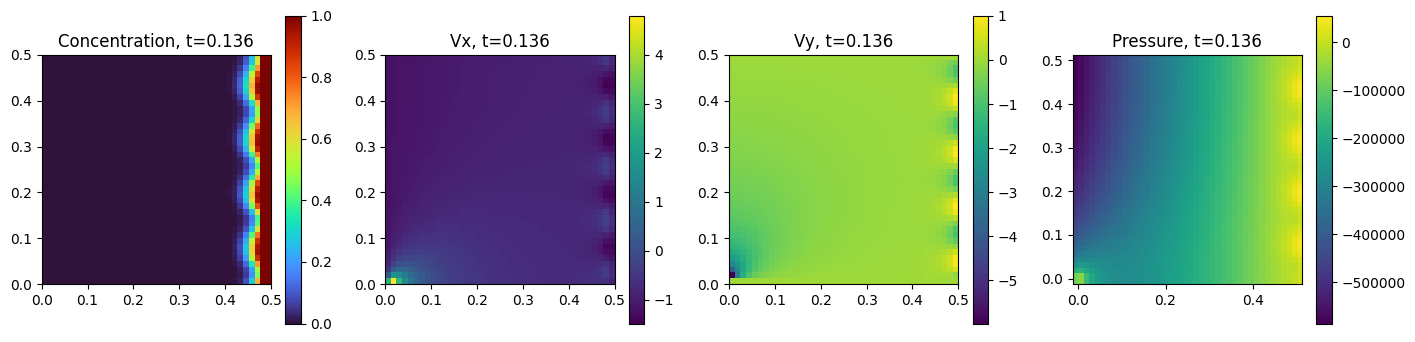

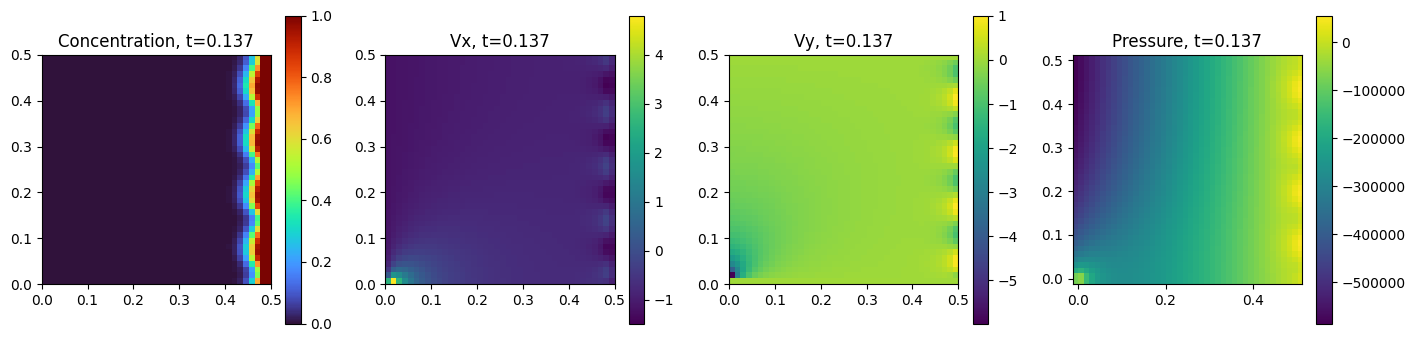

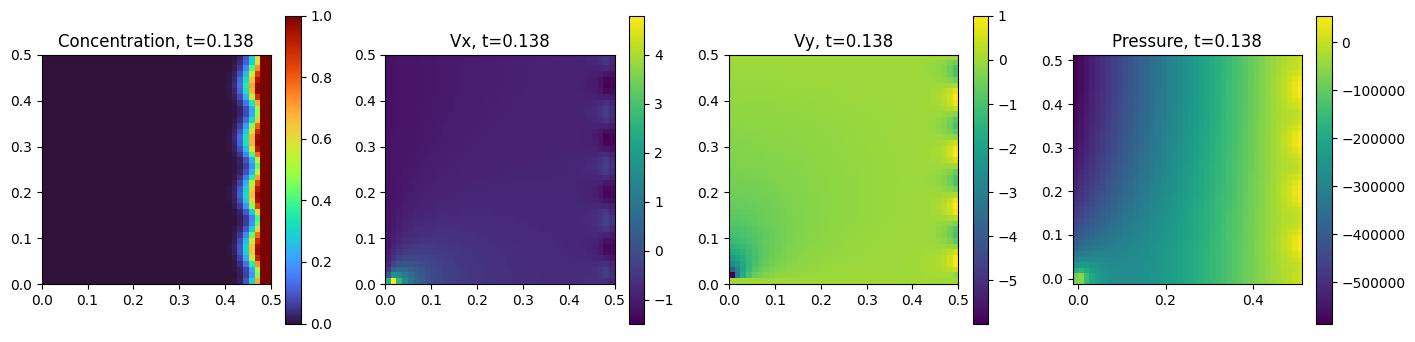

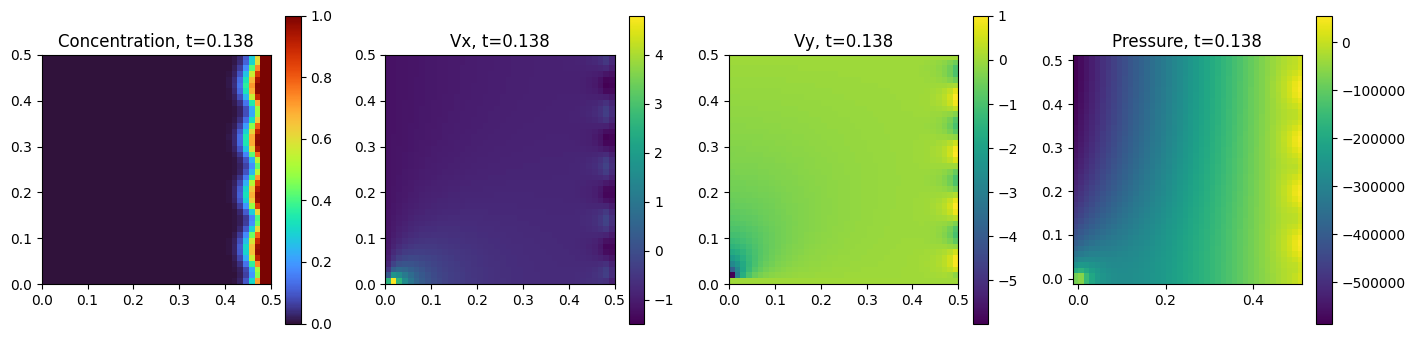

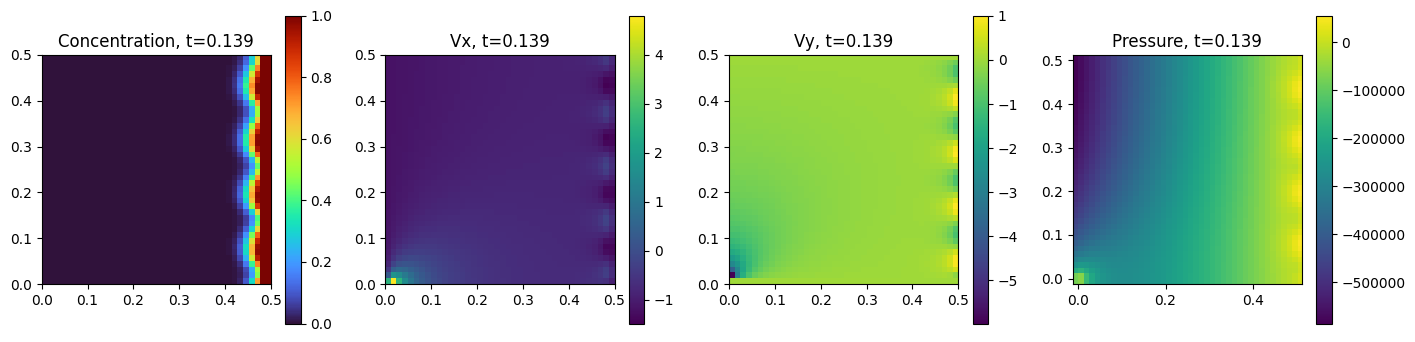

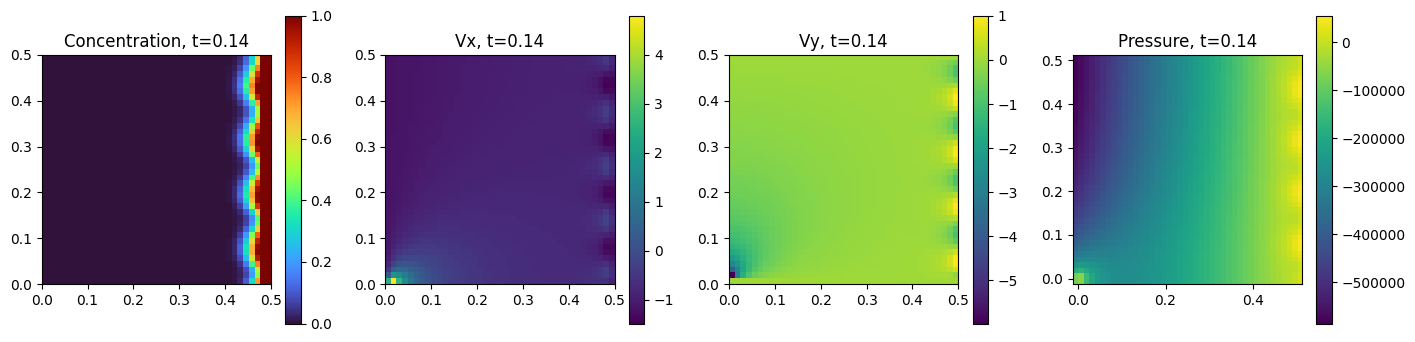

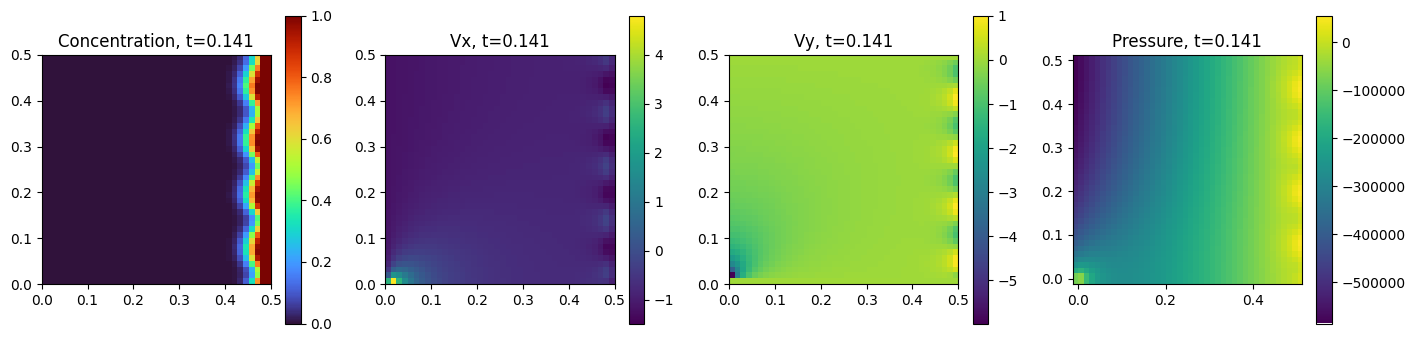

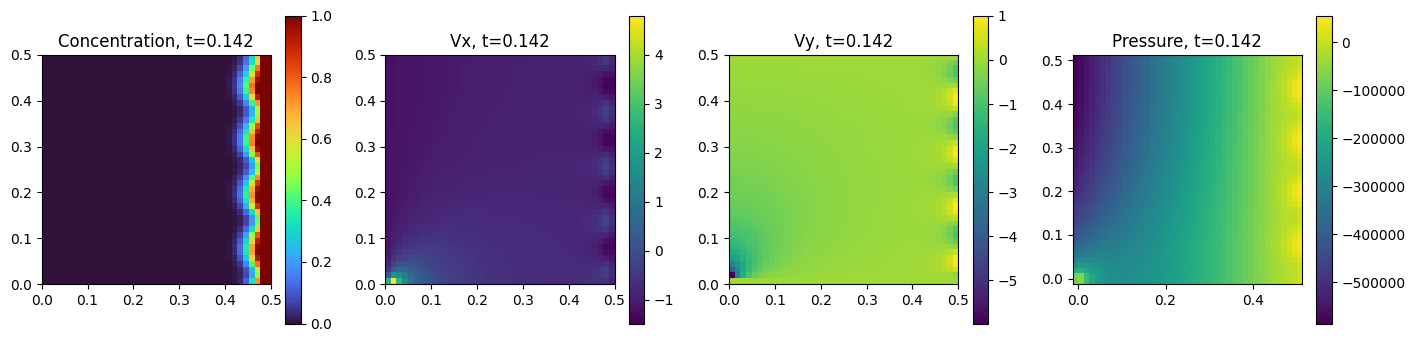

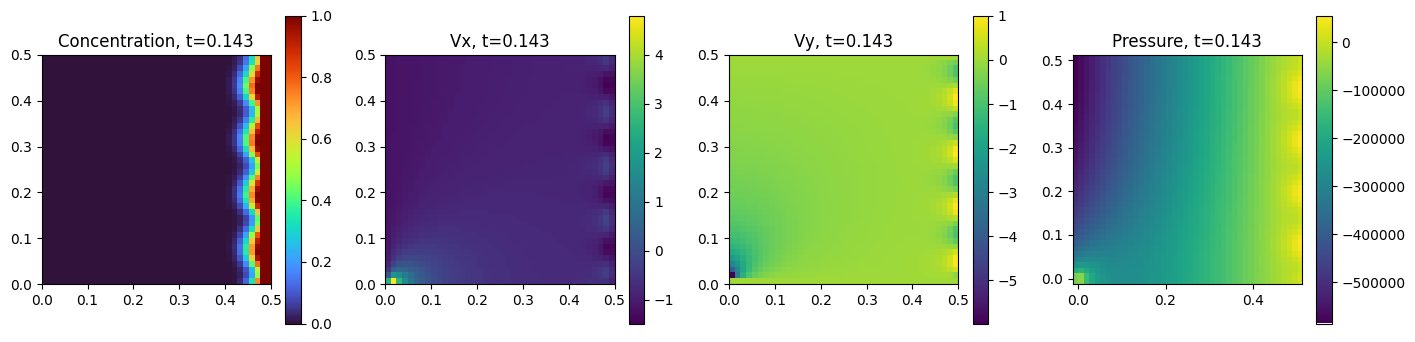

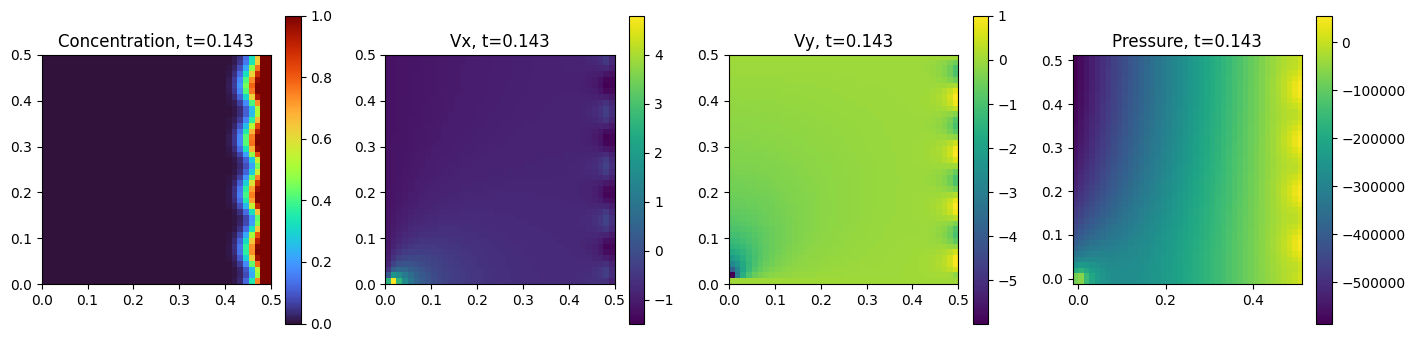

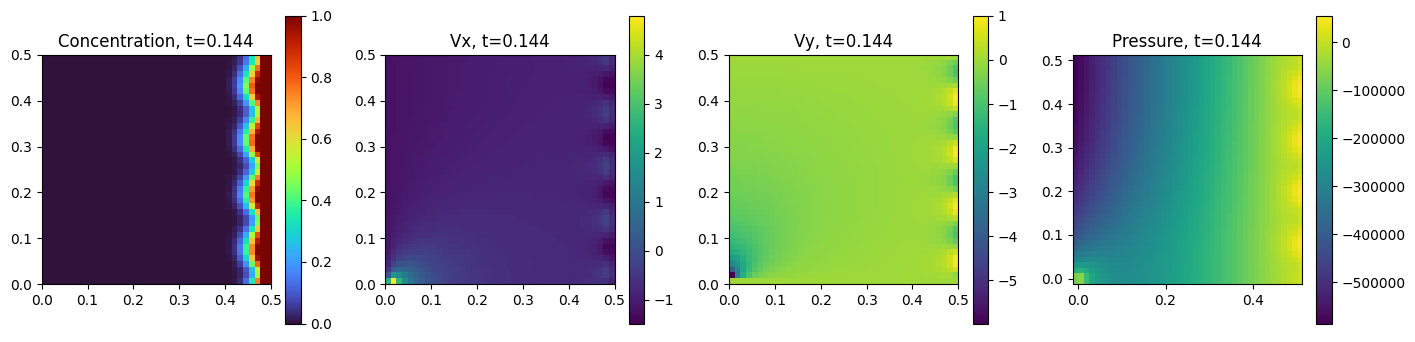

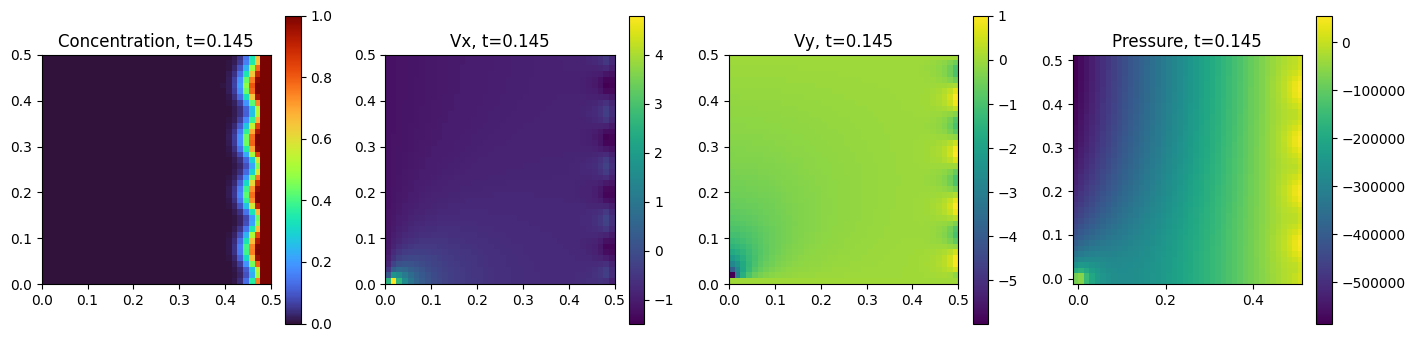

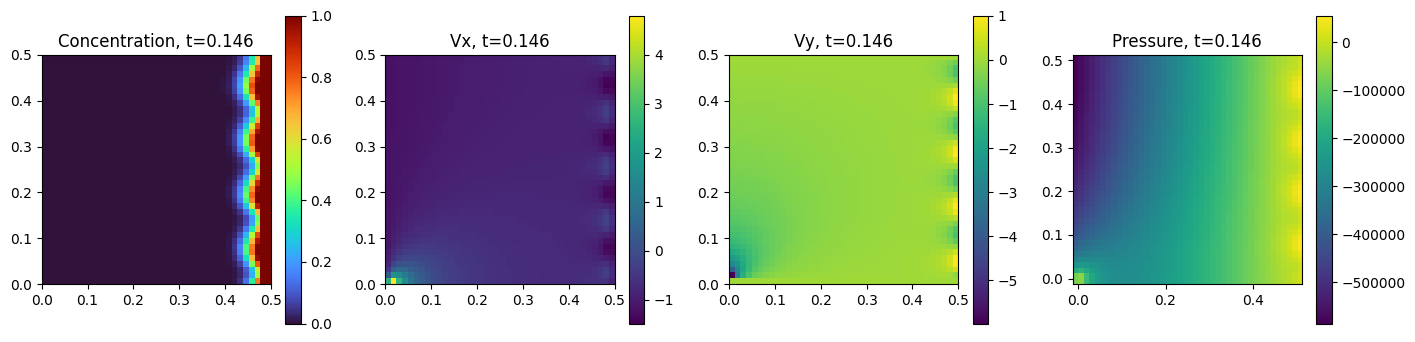

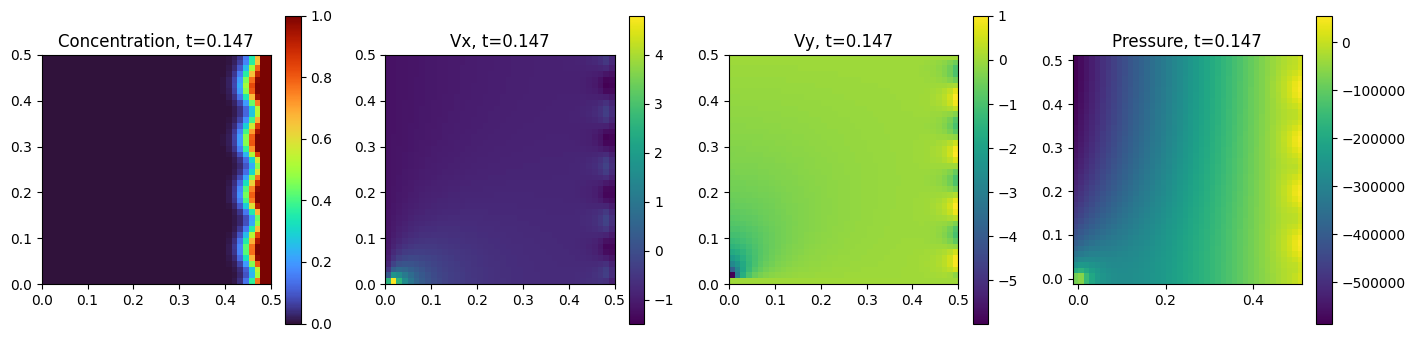

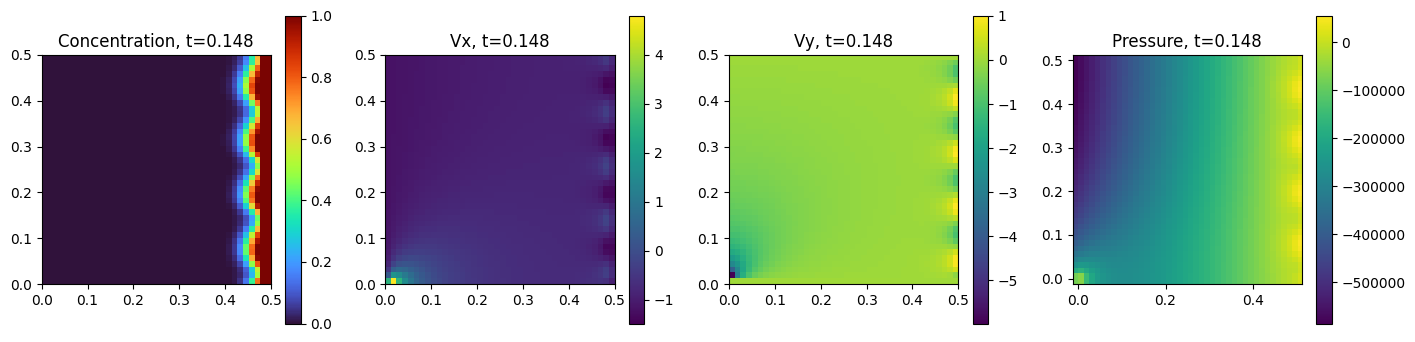

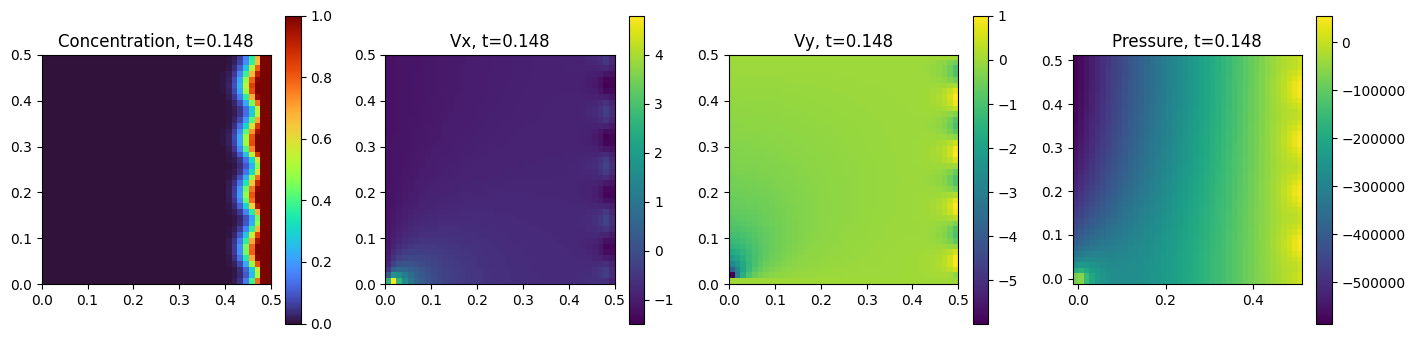

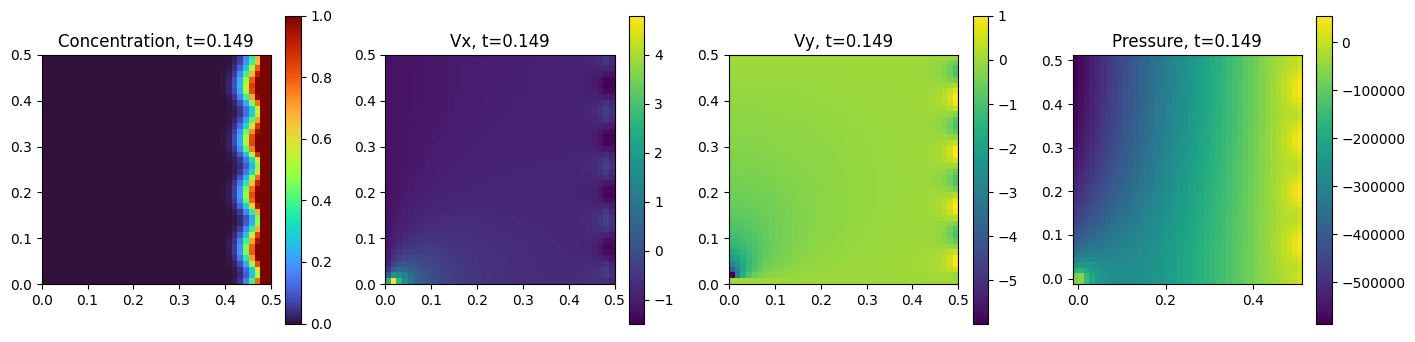

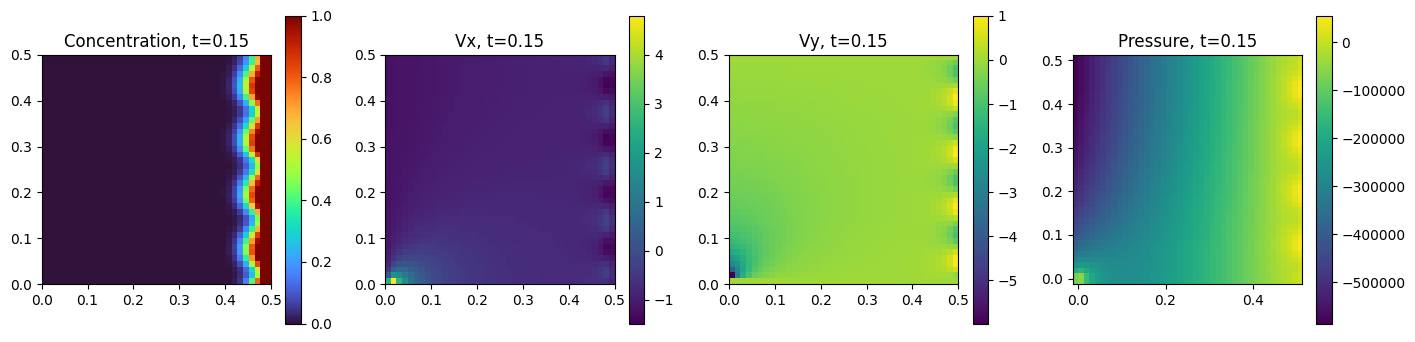

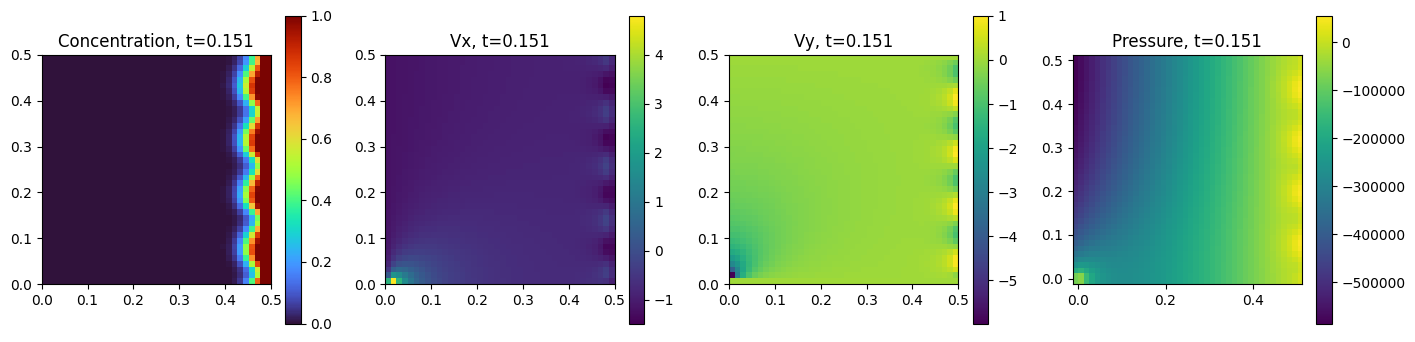

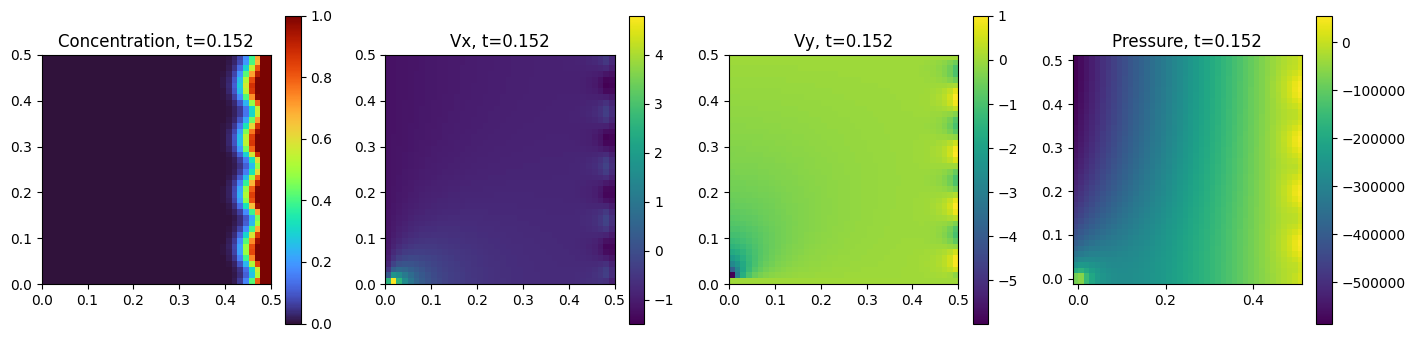

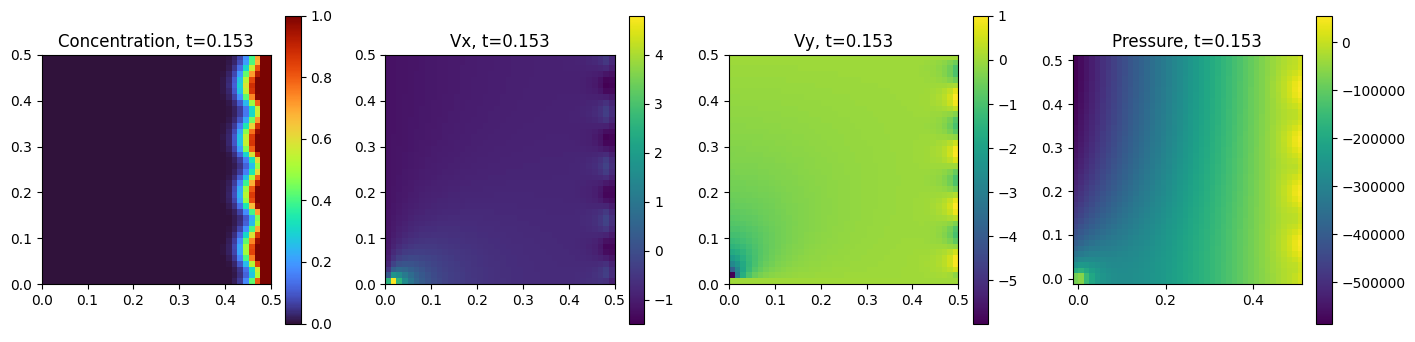

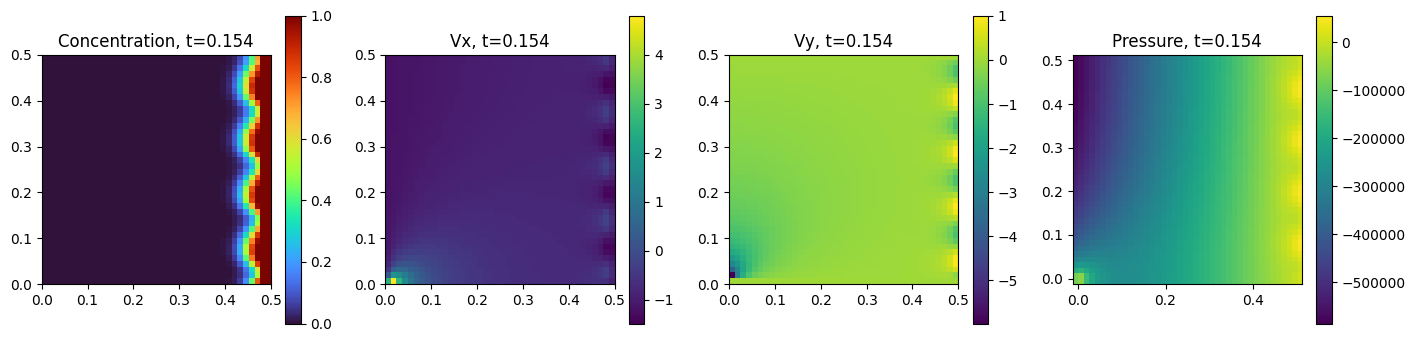

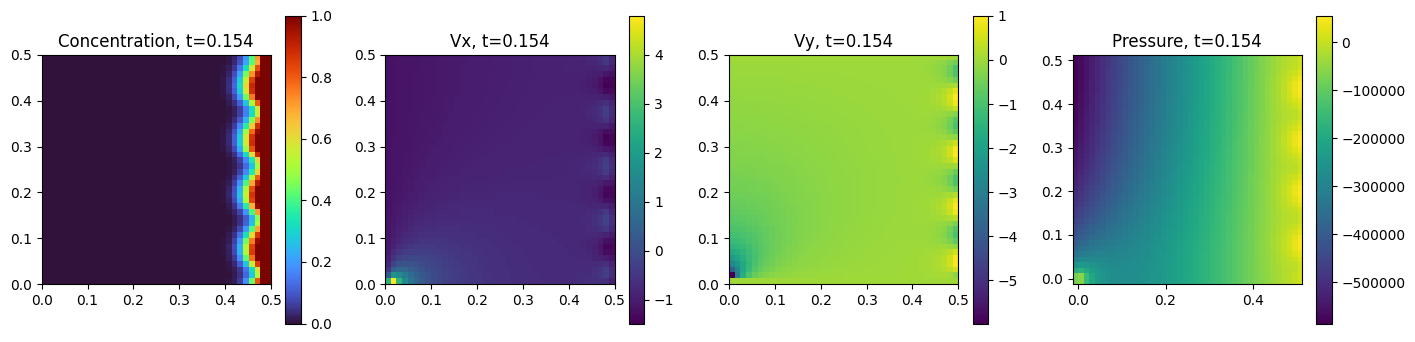

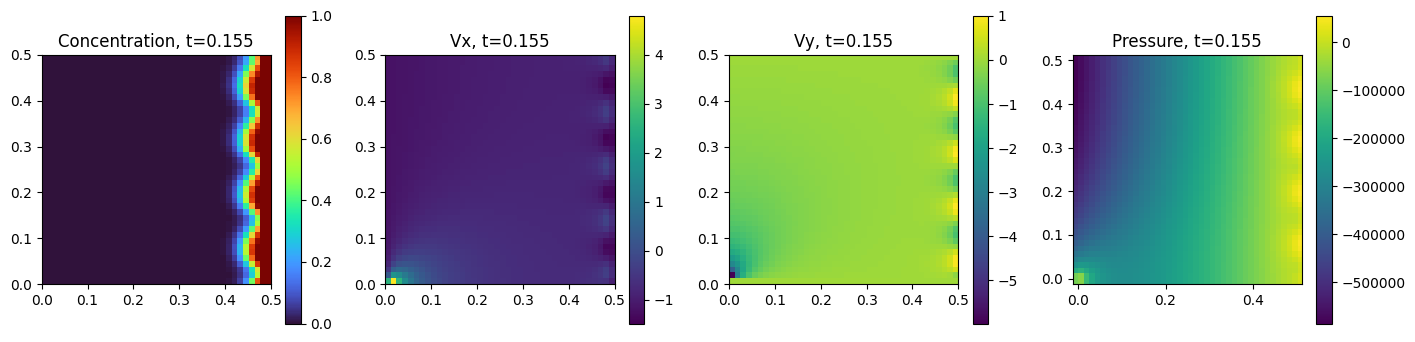

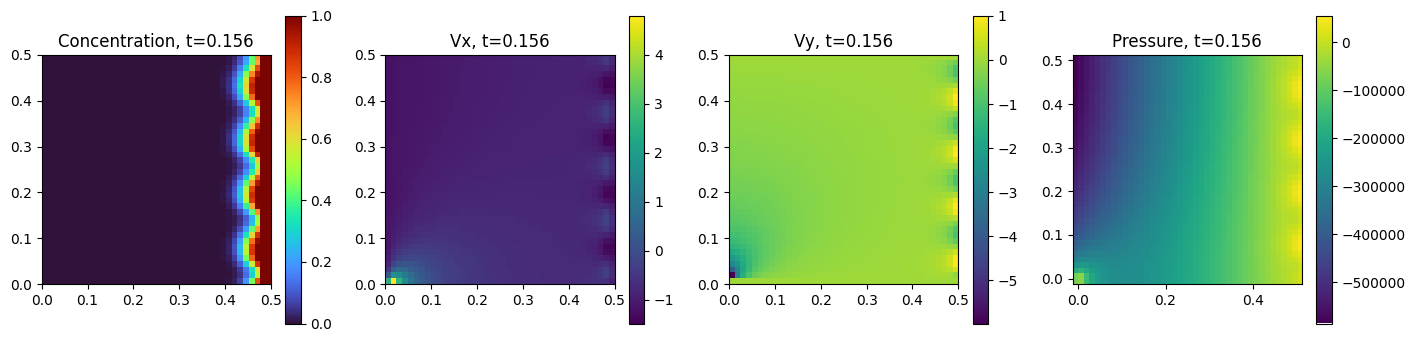

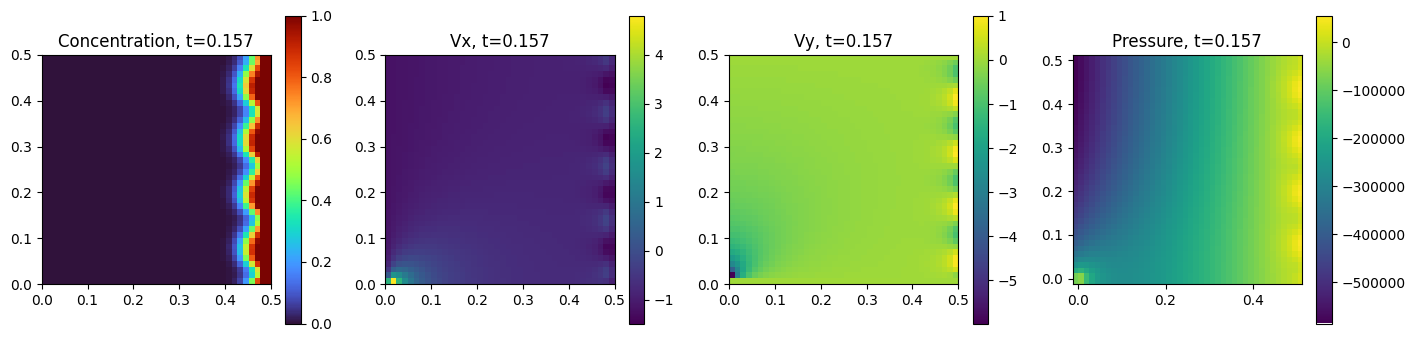

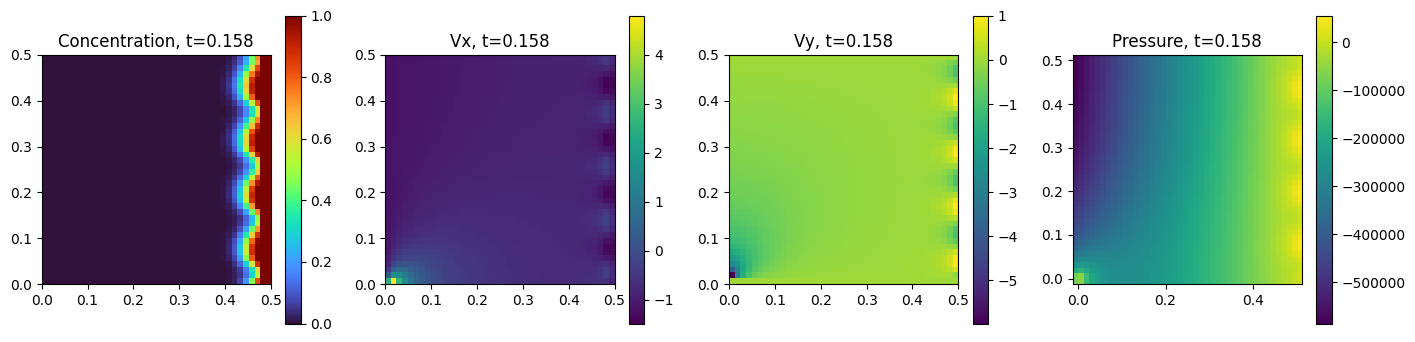

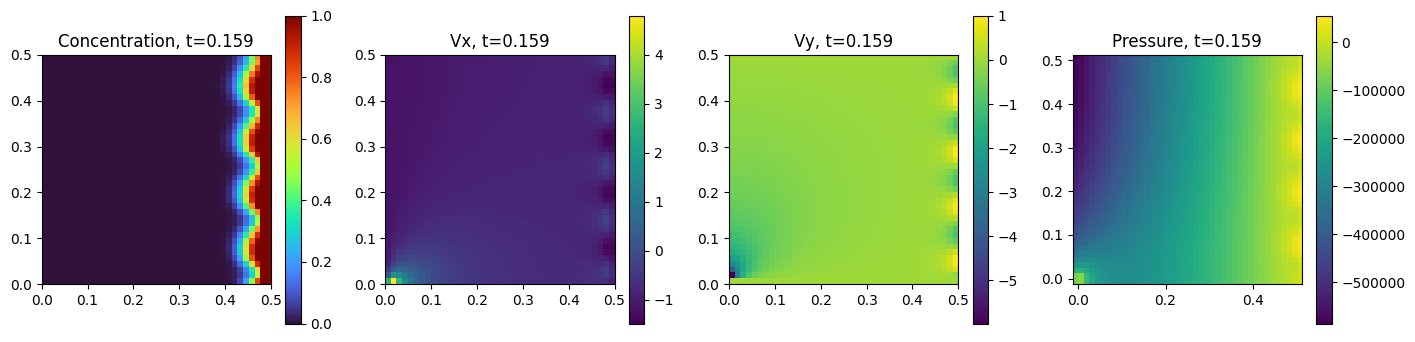

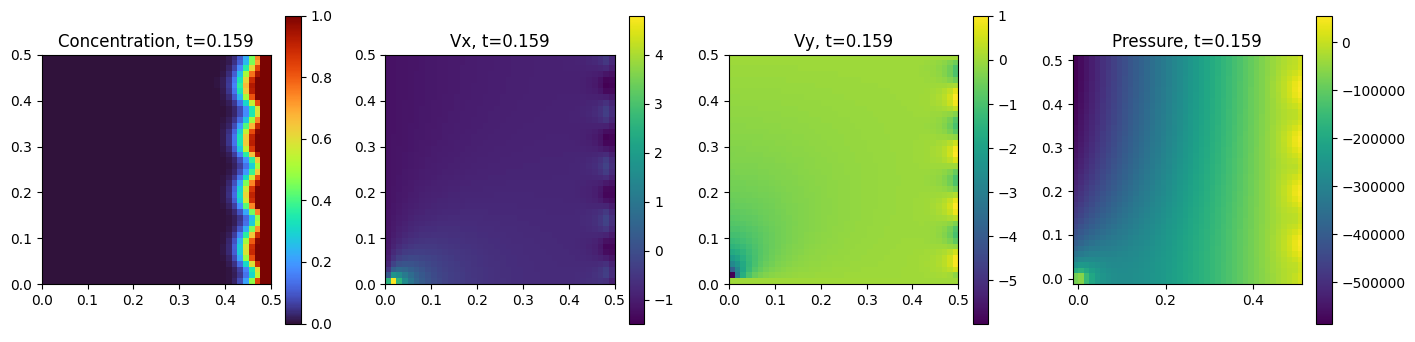

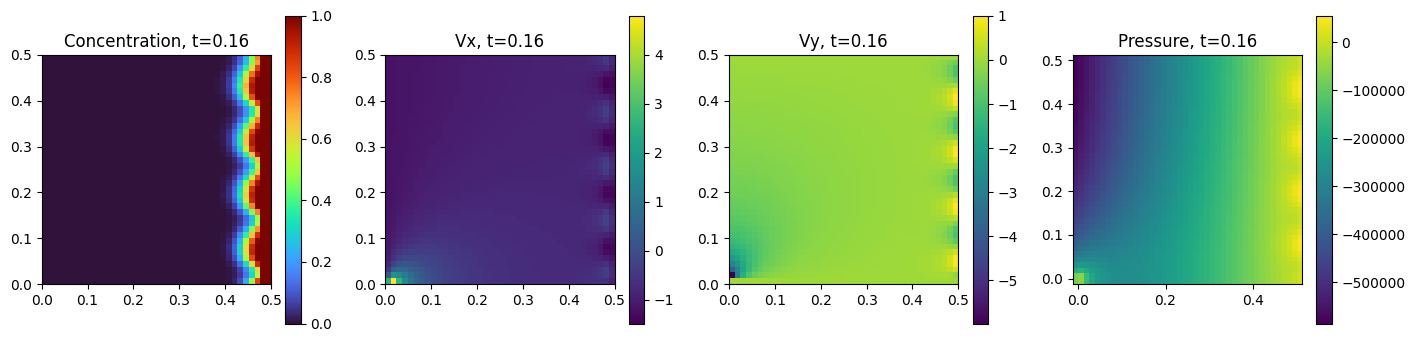

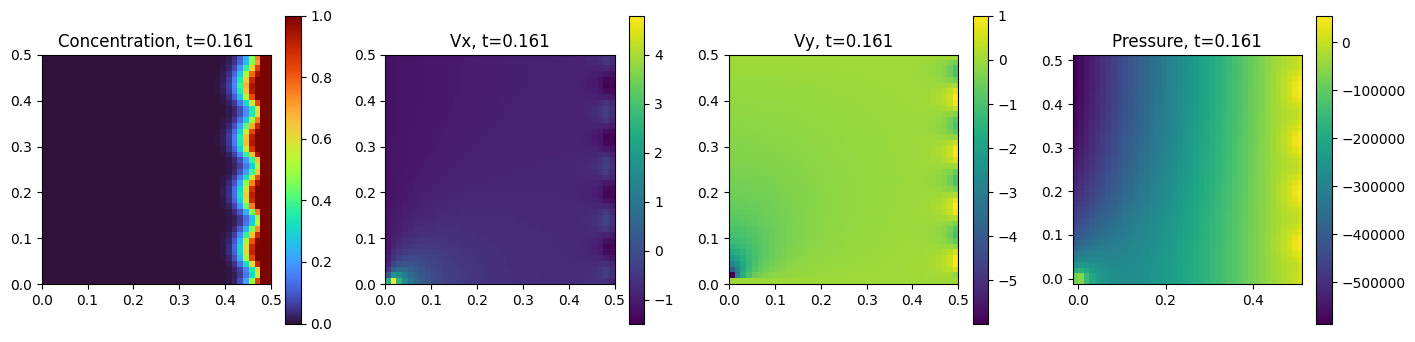

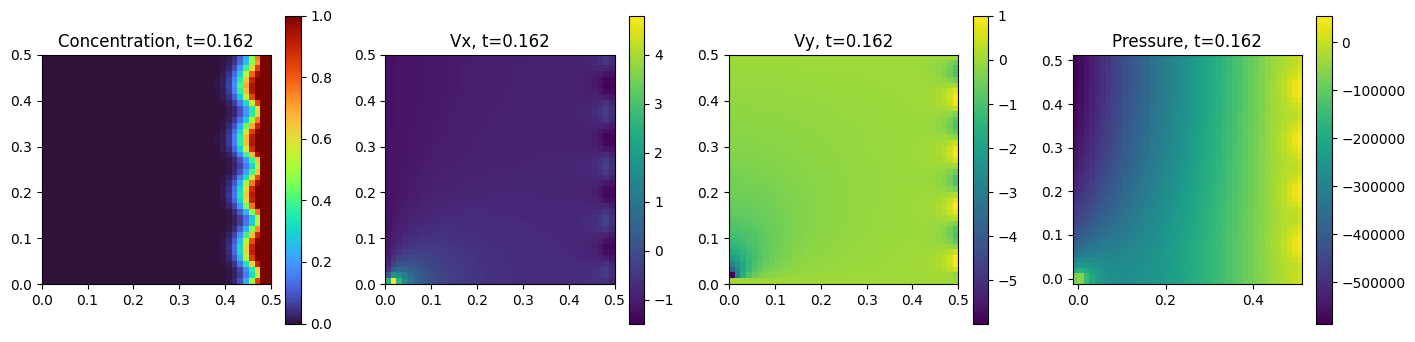

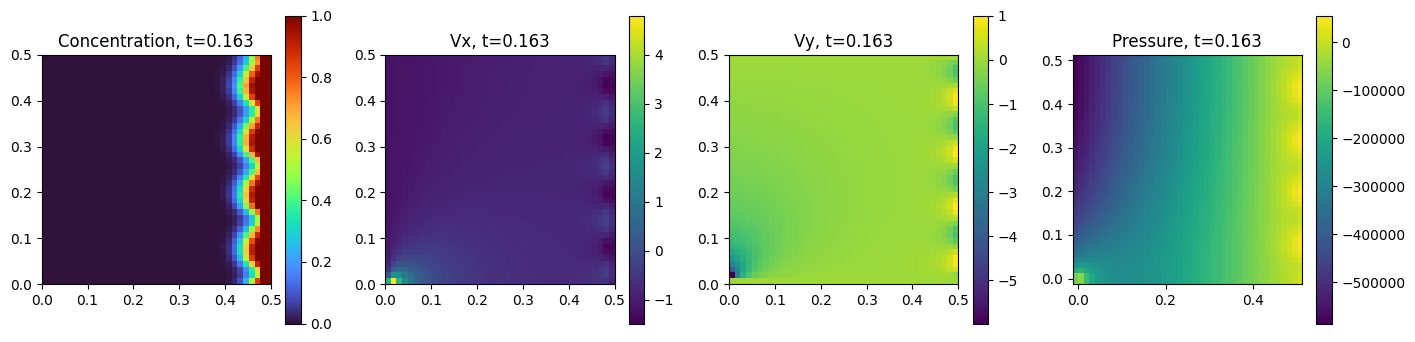

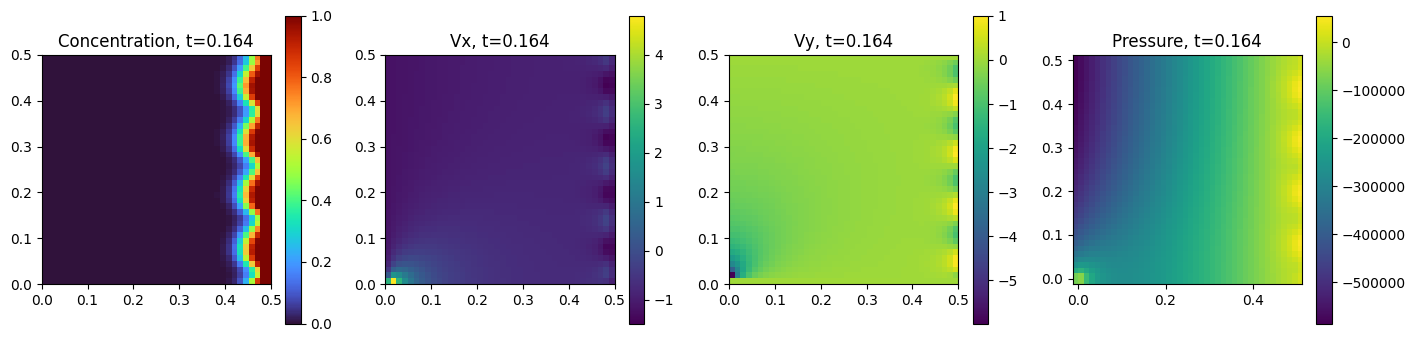

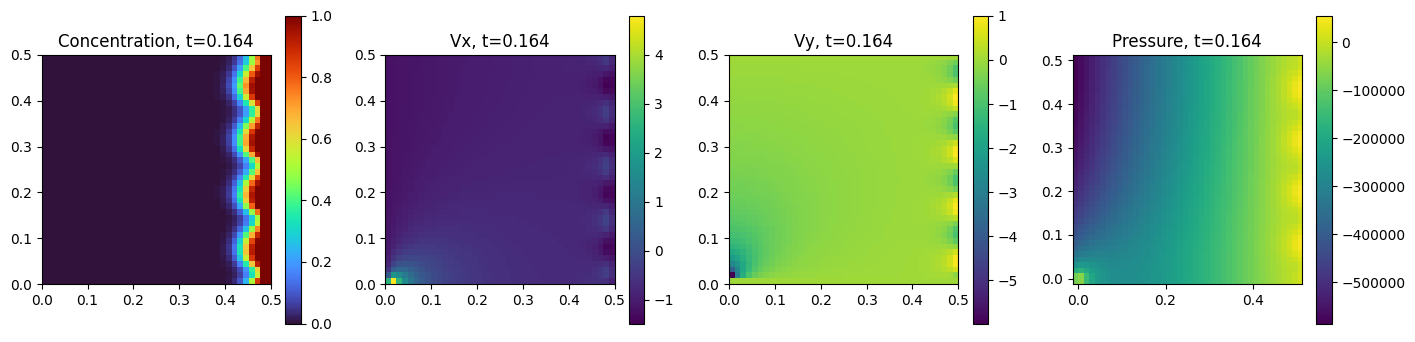

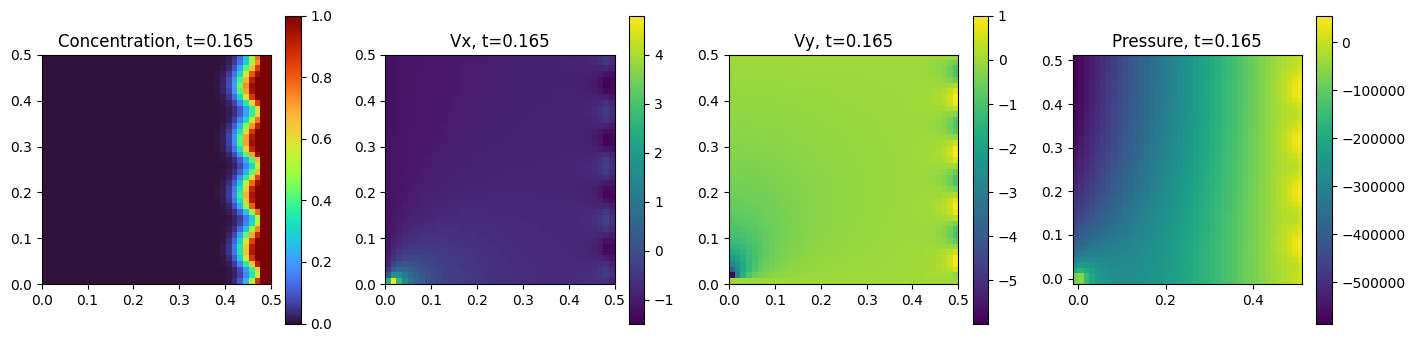

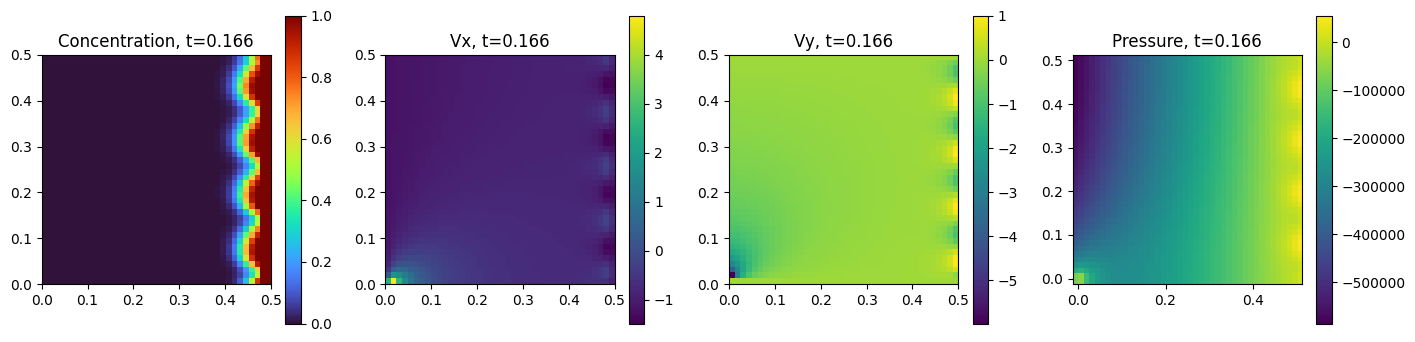

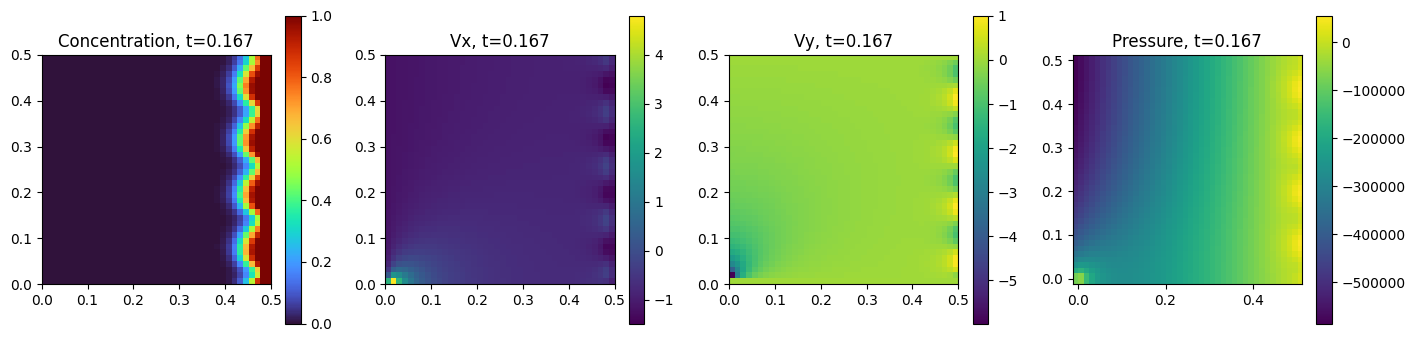

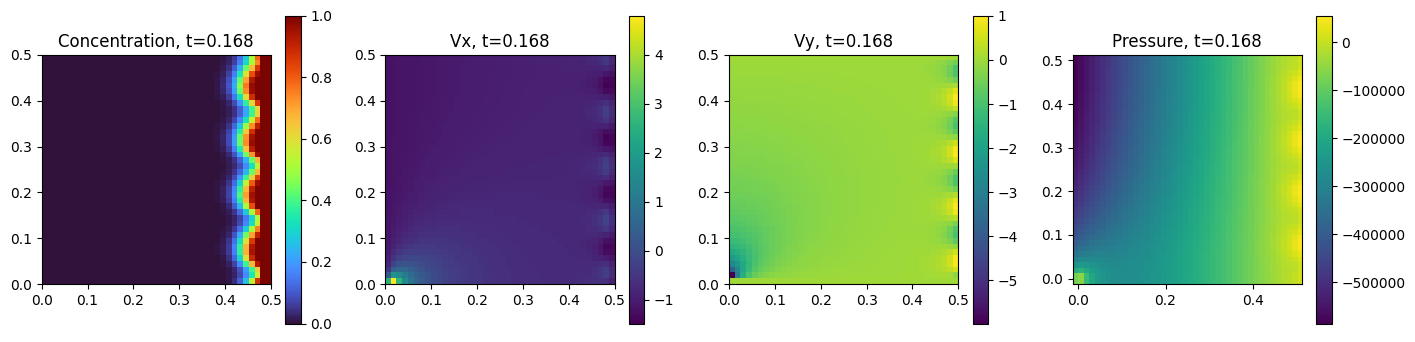

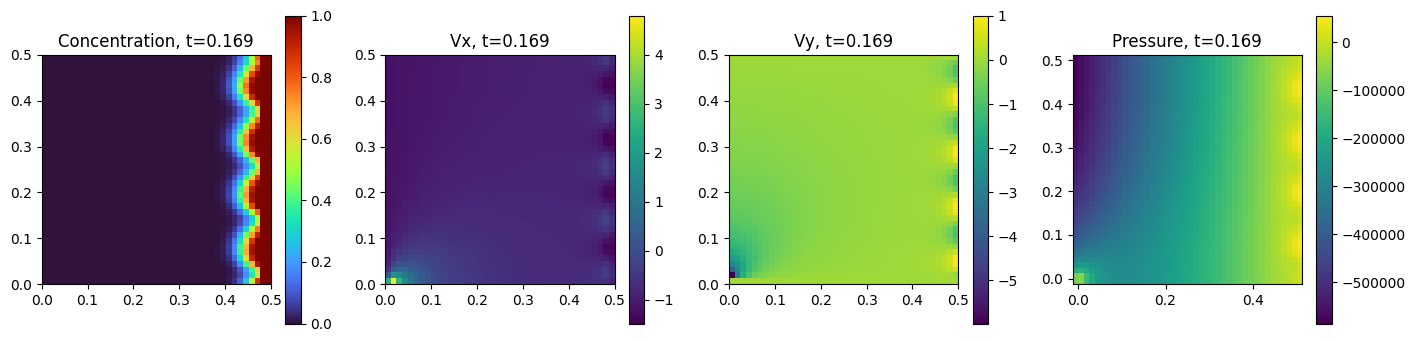

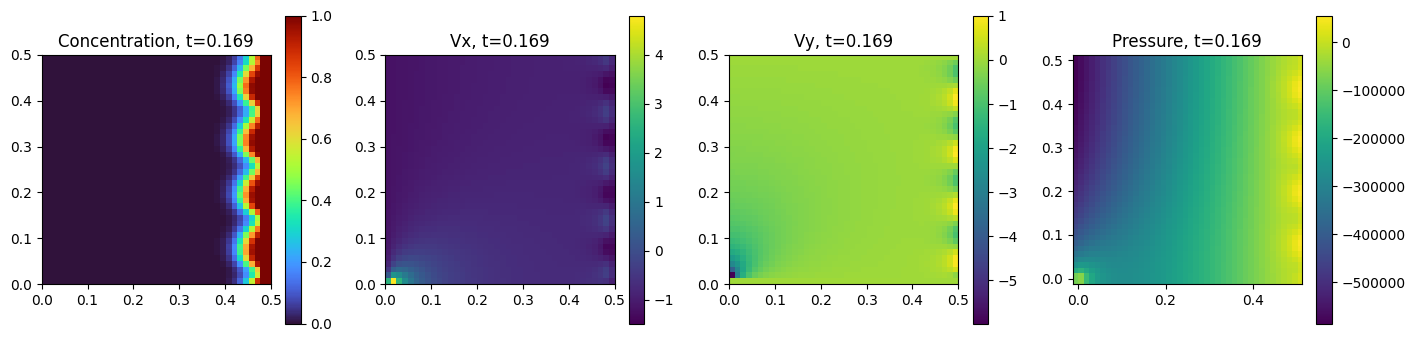

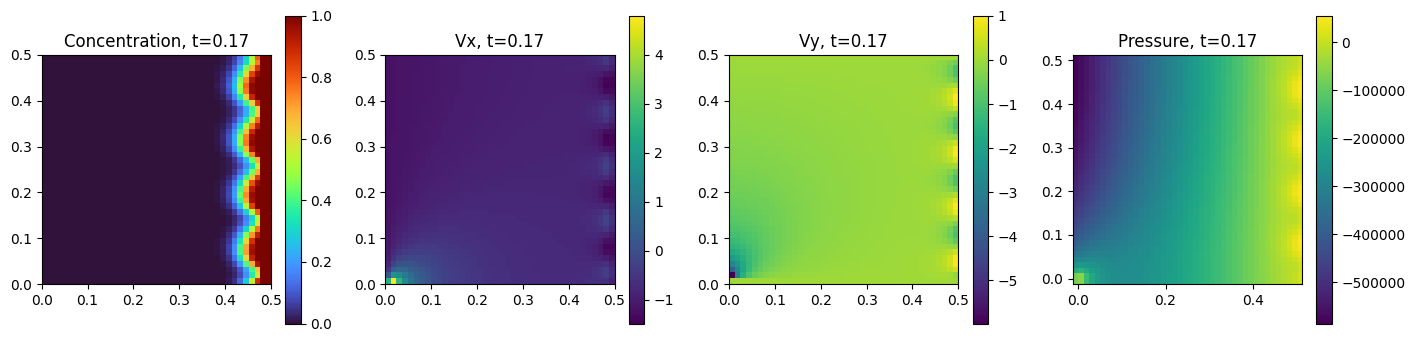

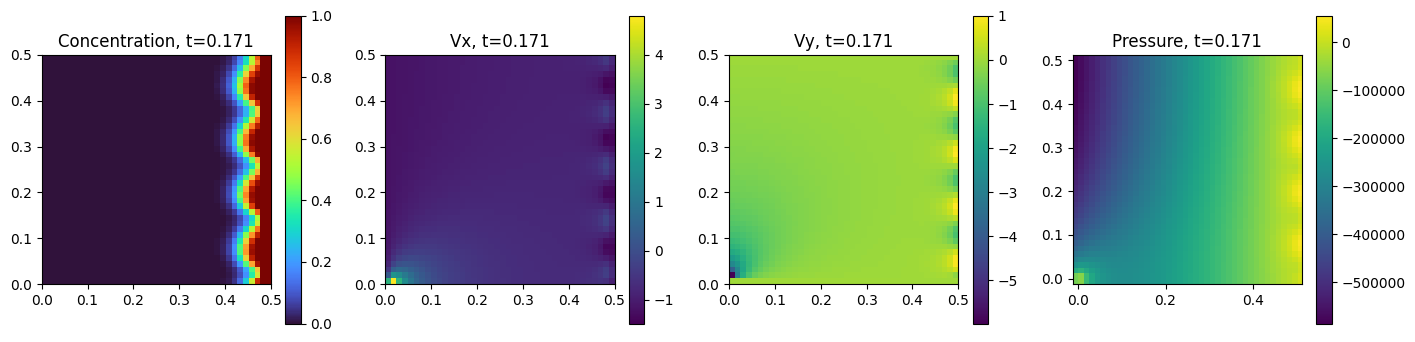

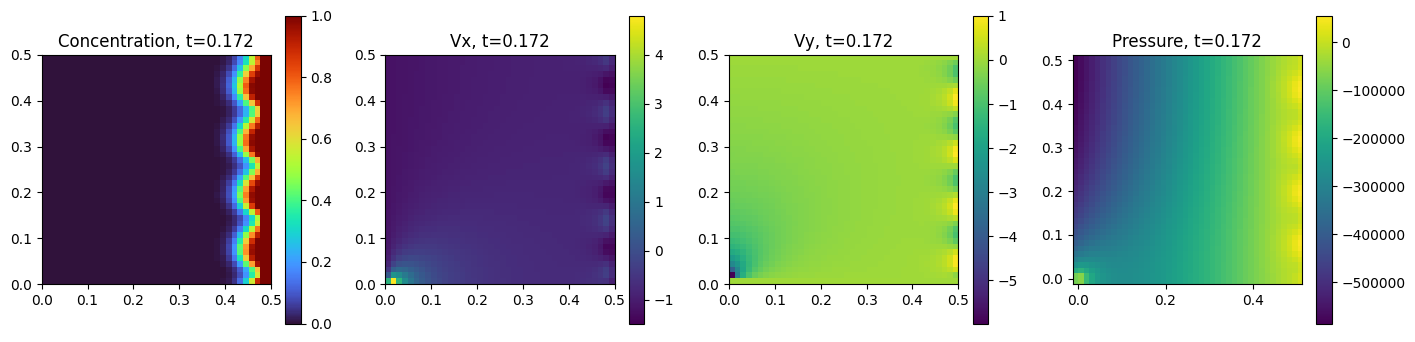

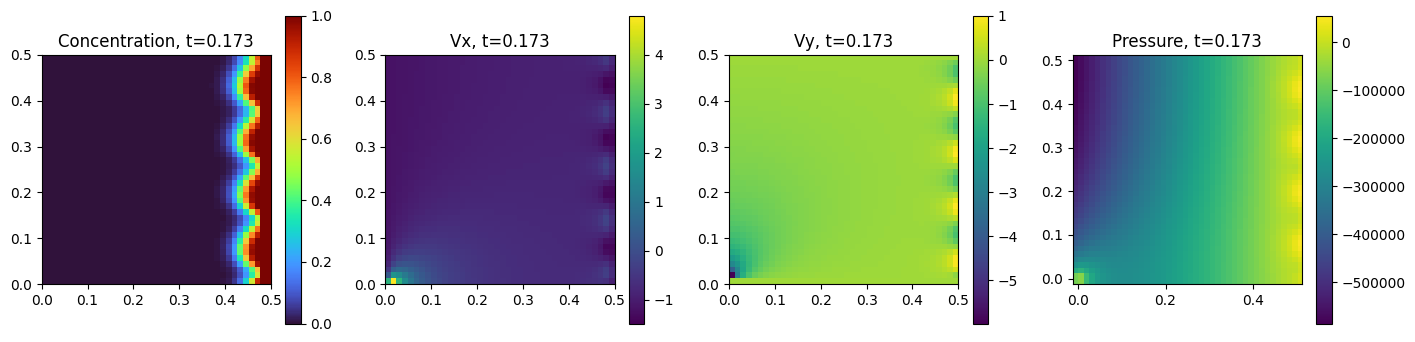

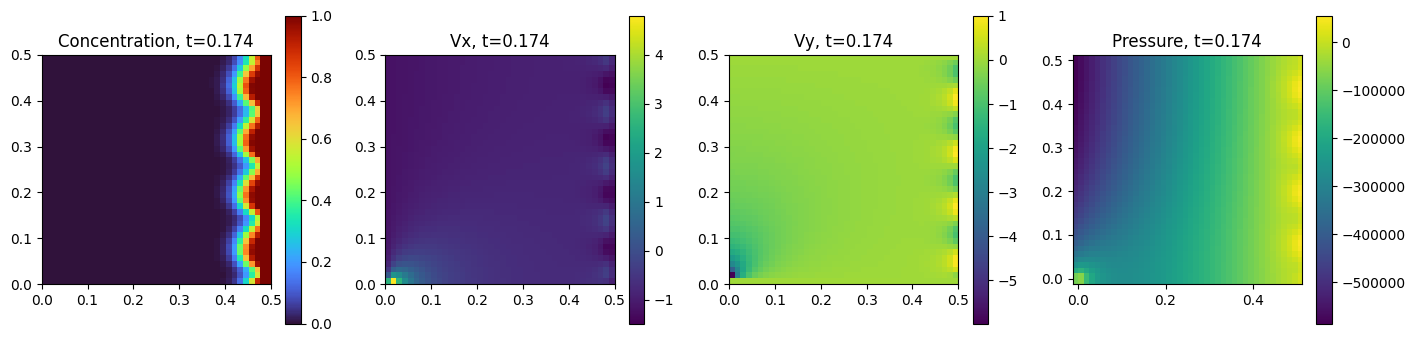

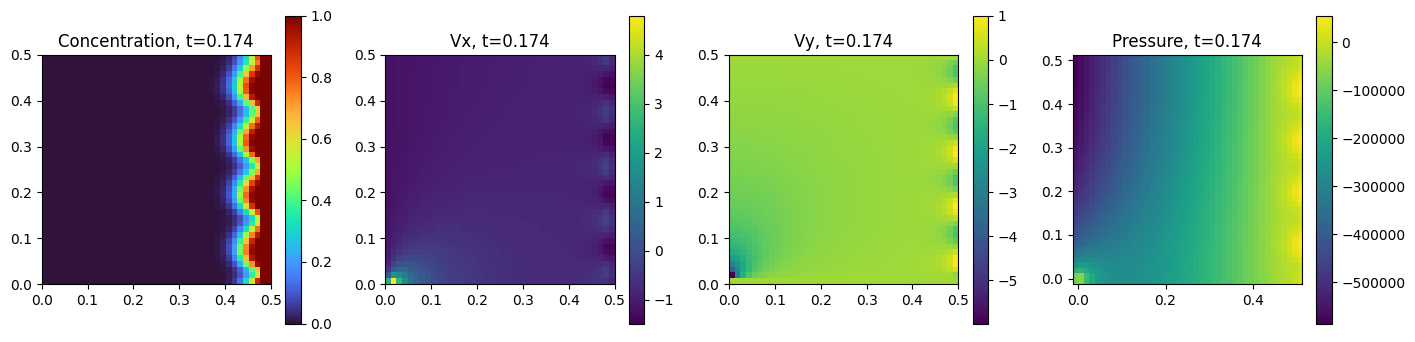

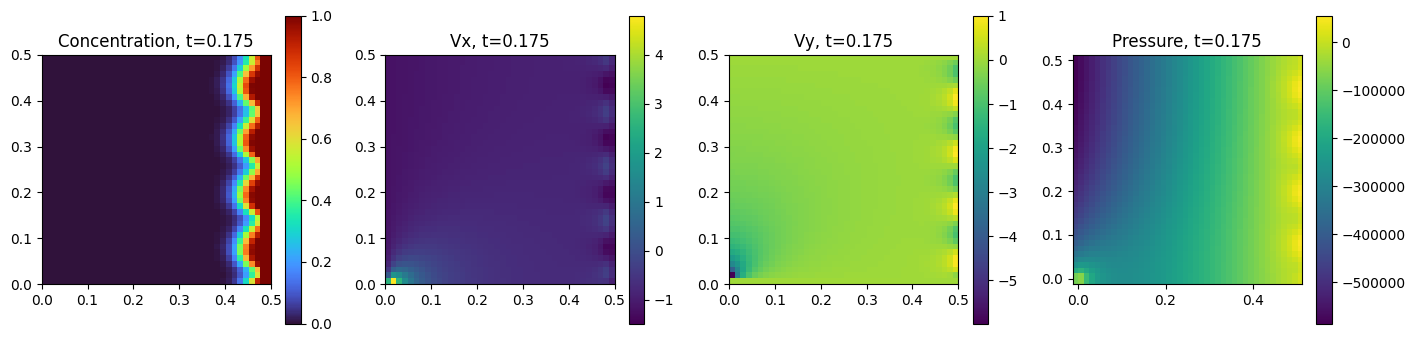

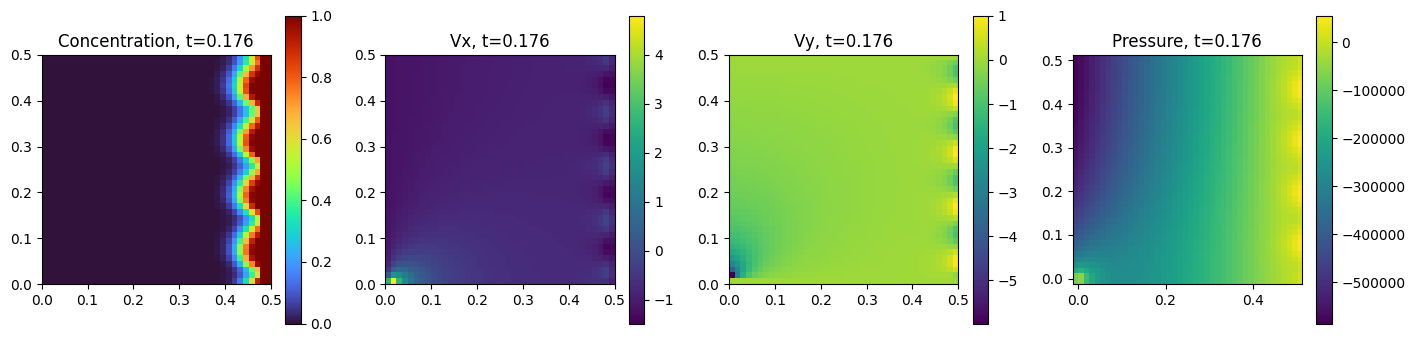

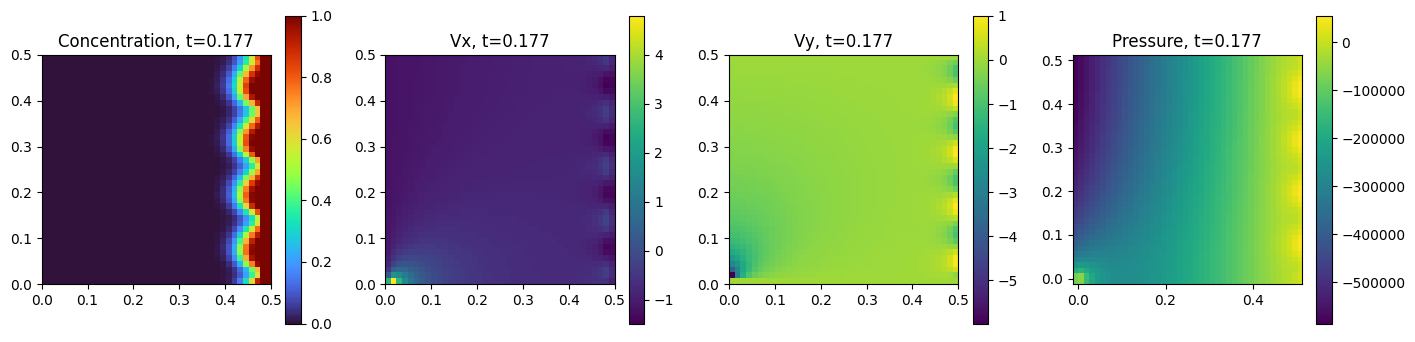

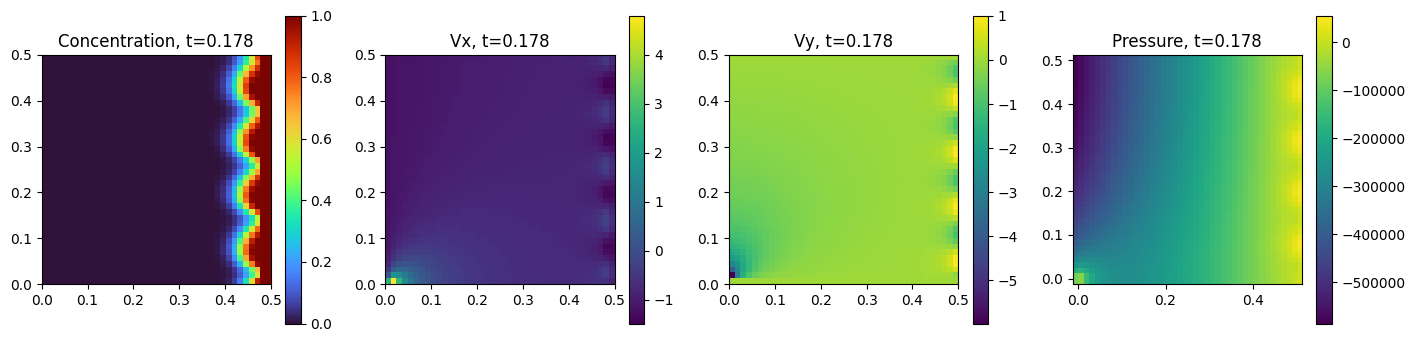

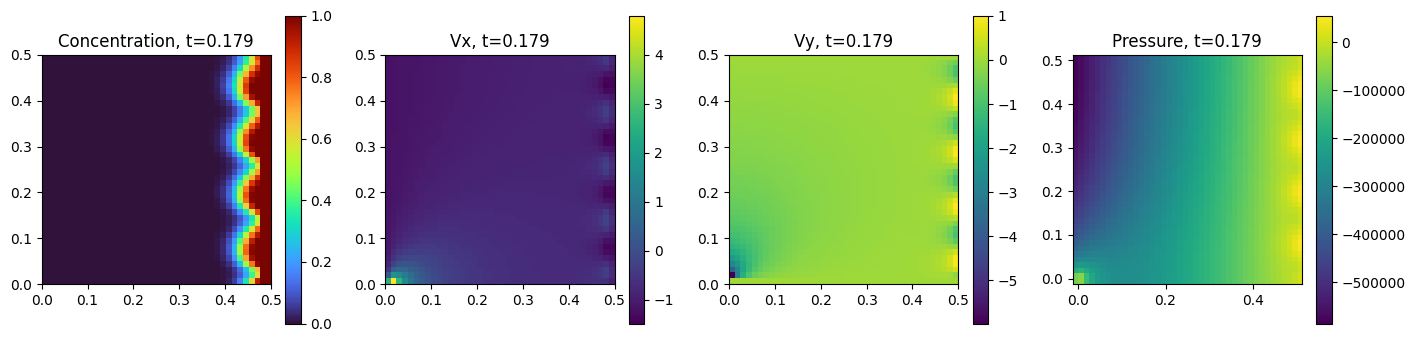

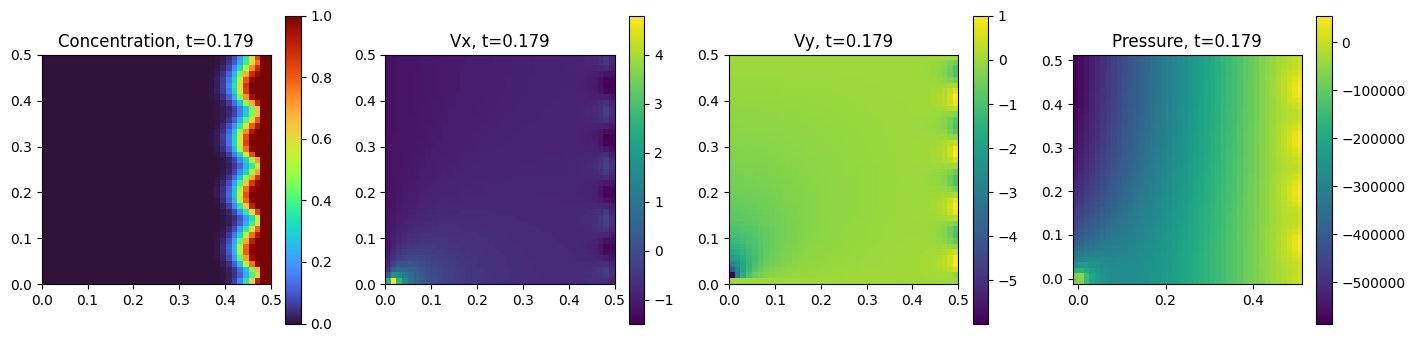

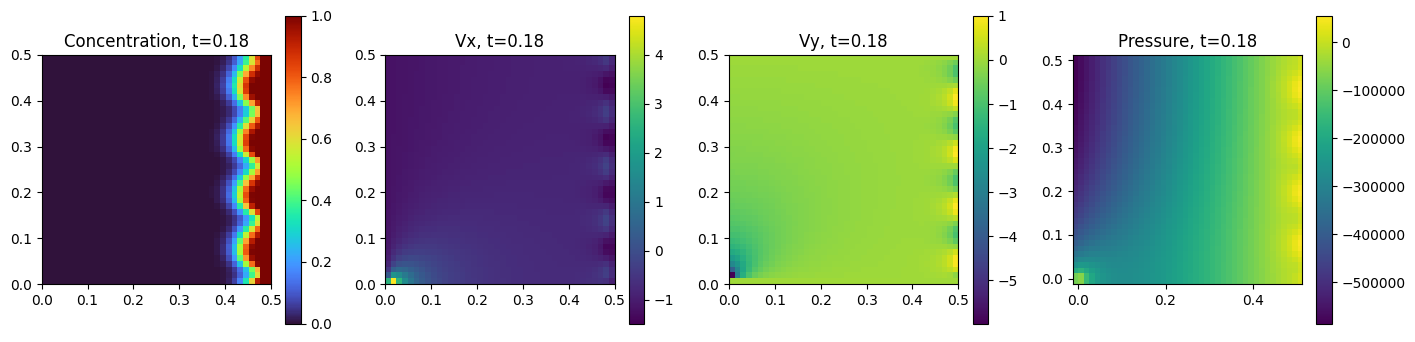

In [ ]:
freq = 25
c_ = C[::freq]
p_ = P[::freq]
Vx_ = Vx[::freq]
Vy_ = Vy[::freq]
for i in range(c_.shape[0]-1):
    plt.figure(figsize=(4*4+1,4))
    plt.subplot(141)
    plt.imshow(c_[i], cmap='turbo', extent=[0, L, 0, H])
    plt.colorbar()
    plt.title(f"Concentration, t={round(ticks[i*freq],3)}")
    plt.subplot(142)
    plt.imshow(np.round(Vx_[i],4), extent=[0, L, 0, H])
    plt.colorbar()
    plt.title(f"Vx, t={round(ticks[i*freq],3)}")
    plt.subplot(143)
    plt.imshow(np.round(Vy_[i],4), extent=[0, L, 0, H])
    plt.colorbar()
    plt.title(f"Vy, t={round(ticks[i*freq],3)}")
    plt.subplot(144)
    plt.imshow(p_[i], extent=[-L/Nx, L+L/Nx, -H/Ny, H+H/Ny])
    plt.colorbar()
    plt.title(f"Pressure, t={round(ticks[i*freq],3)}")
    plt.show()